In [1]:
import os
import itertools
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import pandas as pd
from tqdm import tqdm

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
src_target_dataset_path = "/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target"
dest_target_dataset_path = "/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new"

def get_labels(foldername):
    labels = [f for f in os.listdir(foldername) if f not in [".DS_Store",'._.DS_Store']]
    return labels

## Create images from mov files
dim = (224, 224)

def getFrame(vidcap,sec,path):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        print('Original Dimensions : ',image.shape)
        resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
        cv2.imwrite(path, resized)     # save frame as JPG file
    return hasFrames

def get_images(video_file_path,save_path, filename):
    frameRate = 0.5 # capture 2 frames in a second
    image_write_path  = lambda count: os.path.join(save_path,"%s_frame%d.jpg" % (filename,count))
    count=1
    sec = 0
    vidcap = cv2.VideoCapture(video_file_path)
    success = getFrame(vidcap,sec,image_write_path(count))
    while success:
        count = count + 1
        sec = sec + frameRate
        sec = round(sec, 2)
        success = getFrame(vidcap,sec,image_write_path(count))
        
## resize image
def resize_image(imgpath,savepath):
    img = cv2.imread(imgpath)
    if img is None:
        print("image none",imgpath)
        return
    if len(img.shape)!=3:
        print(img.shape)
        return
    #print('Original Dimensions : ',img.shape)
    
    # resize image
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    cv2.imwrite(savepath, resized)
    return savepath



In [37]:
def walk_through_folders(folders):
    data = {}
    data['filepath']=[]
    data['image']=[]
    data['imagename'] = []
    data['label'] = []
    data["extension"] = []
    empty_files = set()
    for folder in folders:
        image_folder = os.path.join(src_target_dataset_path, folder)
        
        for (dirpath, dirnames, filenames) in os.walk(image_folder):
            if dirnames == ".DS_Store":
                continue

            for f in tqdm(filenames):

                if f == ".DS_Store":
                    continue

                ## check image
                size = os.stat(os.path.join(dirpath,f)).st_size

                if size == 0:
                    empty_files.add(os.path.join(dirpath,f))
                    continue

                ## found two images - odd images - Hank_IMG_6061.JPG, Connie_IMG_3589
                label = os.path.basename(dirpath)
                imagename = f"{label}_{f}"


                if imagename in ['Connie_IMG_3589.JPG','Hank_IMG_6061.JPG']:
                    print("Ignoring image ",imagename)
                    continue

                filename, file_extension = os.path.splitext(f)
                
                if not os.path.exists(os.path.join(dest_target_dataset_path,label)):
                    os.makedirs(os.path.join(dest_target_dataset_path,label))
            
                ## check image files
                current_file_path = os.path.join(dirpath, f)
                
                if file_extension==".JPG":
                    ## resize image and copy
                    resize_image(current_file_path,os.path.join(dest_target_dataset_path,label,imagename))
                    
                elif file_extension==".MOV":
                    ## get frames and copy
                    get_images(current_file_path,os.path.join(dest_target_dataset_path,label), f"{label}_{filename}")
                else:
                    ## print file
                    print(current_file_path, imagename)
                    
                    
                data["extension"].append(file_extension)
                data['label'].append(label)
                data['image'].append(f)
                data['imagename'].append(imagename)
                data['filepath'].append(os.path.join(dirpath, f))
                

In [38]:
folders = get_labels(src_target_dataset_path)

In [39]:
folders

['Sunny',
 'Spike',
 'Swarna',
 'Connie',
 'Rudy',
 'Kamala',
 'Schottzie',
 'Sabu',
 'Beco',
 'Jati',
 'Pheobe',
 'MyThai',
 'Hank',
 'Maharani']

In [40]:
walk_through_folders(["Hank","Maharani"])





  0%|          | 0/2265 [00:00<?, ?it/s]



  0%|          | 1/2265 [00:00<11:43,  3.22it/s]



  0%|          | 2/2265 [00:00<11:57,  3.16it/s]



  0%|          | 3/2265 [00:00<11:21,  3.32it/s]



  0%|          | 4/2265 [00:01<11:24,  3.30it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  0%|          | 5/2265 [00:02<17:10,  2.19it/s]

Original Dimensions :  (1080, 1440, 3)






  0%|          | 6/2265 [00:02<15:41,  2.40it/s]



  0%|          | 7/2265 [00:02<14:13,  2.65it/s]



  0%|          | 8/2265 [00:02<13:17,  2.83it/s]



  0%|          | 9/2265 [00:03<13:28,  2.79it/s]



  0%|          | 10/2265 [00:03<14:06,  2.66it/s]



  0%|          | 11/2265 [00:04<14:25,  2.60it/s]



  1%|          | 12/2265 [00:04<15:01,  2.50it/s]



  1%|          | 13/2265 [00:04<15:05,  2.49it/s]



  1%|          | 14/2265 [00:05<15:13,  2.46it/s]



  1%|          | 15/2265 [00:05<13:12,  2.84it/s]



  1%|          | 16/2265 [00:05<12:25,  3.02it/s]



  1%|          | 17/2265 [00:06<13:01,  2.88it/s]



  1%|          | 18/2265 [00:06<12:59,  2.88it/s]



  1%|          | 19/2265 [00:07<13:54,  2.69it/s]



  1%|          | 20/2265 [00:07<14:49,  2.52it/s]



  1%|          | 21/2265 [00:07<15:01,  2.49it/s]



  1%|          | 22/2265 [00:08<17:14,  2.17it/s]

Original Dimensions :  (1080, 1440, 3)






  1%|          | 23/2265 [00:08<16:14,  2.30it/s]



  1%|          | 24/2265 [00:09<15:15,  2.45it/s]



  1%|          | 25/2265 [00:09<15:41,  2.38it/s]



  1%|          | 26/2265 [00:10<16:56,  2.20it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  1%|          | 27/2265 [00:11<21:29,  1.74it/s]



  1%|          | 28/2265 [00:11<22:18,  1.67it/s]



  1%|▏         | 29/2265 [00:12<20:12,  1.84it/s]



  1%|▏         | 30/2265 [00:12<18:58,  1.96it/s]



  1%|▏         | 31/2265 [00:12<17:47,  2.09it/s]



  1%|▏         | 32/2265 [00:13<15:47,  2.36it/s]



  1%|▏         | 33/2265 [00:13<15:35,  2.39it/s]



  2%|▏         | 34/2265 [00:14<16:39,  2.23it/s]



  2%|▏         | 35/2265 [00:14<16:38,  2.23it/s]



  2%|▏         | 36/2265 [00:14<15:03,  2.47it/s]



  2%|▏         | 37/2265 [00:15<16:05,  2.31it/s]



  2%|▏         | 38/2265 [00:15<16:15,  2.28it/s]



  2%|▏         | 39/2265 [00:16<16:40,  2.23it/s]



  2%|▏         | 40/2265 [00:16<15:27,  2.40it/s]



  2%|▏         | 41/2265 [00:17<14:08,  2.62it/s]



  2%|▏         | 42/2265 [00:17<17:14,  2.15it/s]

Original Dimensions :  (1080, 1440, 3)






  2%|▏         | 43/2265 [00:18<18:04,  2.05it/s]



  2%|▏         | 44/2265 [00:18<18:37,  1.99it/s]



  2%|▏         | 45/2265 [00:19<17:13,  2.15it/s]



  2%|▏         | 46/2265 [00:19<16:31,  2.24it/s]



  2%|▏         | 47/2265 [00:19<16:29,  2.24it/s]



  2%|▏         | 48/2265 [00:20<16:24,  2.25it/s]



  2%|▏         | 49/2265 [00:20<15:56,  2.32it/s]



  2%|▏         | 50/2265 [00:21<15:21,  2.40it/s]



  2%|▏         | 51/2265 [00:21<15:21,  2.40it/s]



  2%|▏         | 52/2265 [00:21<14:11,  2.60it/s]



  2%|▏         | 53/2265 [00:22<14:04,  2.62it/s]



  2%|▏         | 54/2265 [00:22<14:23,  2.56it/s]



  2%|▏         | 55/2265 [00:23<14:22,  2.56it/s]



  2%|▏         | 56/2265 [00:23<13:03,  2.82it/s]



  3%|▎         | 57/2265 [00:23<14:15,  2.58it/s]



  3%|▎         | 58/2265 [00:24<13:33,  2.71it/s]



  3%|▎         | 59/2265 [00:24<14:53,  2.47it/s]



  3%|▎         | 60/2265 [00:25<19:45,  1.86it/s]



  3%|▎         | 61/2265 [00:25<18:20,  2.

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  3%|▎         | 77/2265 [00:34<32:33,  1.12it/s]



  3%|▎         | 78/2265 [00:34<26:30,  1.38it/s]



  3%|▎         | 79/2265 [00:35<21:55,  1.66it/s]



  4%|▎         | 80/2265 [00:35<18:46,  1.94it/s]



  4%|▎         | 81/2265 [00:36<18:44,  1.94it/s]

Original Dimensions :  (1080, 1440, 3)






  4%|▎         | 82/2265 [00:36<16:38,  2.19it/s]



  4%|▎         | 83/2265 [00:36<16:33,  2.20it/s]



  4%|▎         | 84/2265 [00:37<16:21,  2.22it/s]



  4%|▍         | 85/2265 [00:37<16:17,  2.23it/s]



  4%|▍         | 86/2265 [00:38<15:22,  2.36it/s]



  4%|▍         | 87/2265 [00:38<15:03,  2.41it/s]



  4%|▍         | 88/2265 [00:38<15:07,  2.40it/s]



  4%|▍         | 89/2265 [00:39<14:36,  2.48it/s]



  4%|▍         | 90/2265 [00:39<14:33,  2.49it/s]



  4%|▍         | 91/2265 [00:40<14:23,  2.52it/s]



  4%|▍         | 92/2265 [00:40<14:58,  2.42it/s]



  4%|▍         | 93/2265 [00:41<15:51,  2.28it/s]



  4%|▍         | 94/2265 [00:41<14:42,  2.46it/s]



  4%|▍         | 95/2265 [00:41<14:55,  2.42it/s]



  4%|▍         | 96/2265 [00:42<15:39,  2.31it/s]



  4%|▍         | 97/2265 [00:42<13:30,  2.67it/s]



  4%|▍         | 98/2265 [00:42<14:04,  2.57it/s]



  4%|▍         | 99/2265 [00:43<14:34,  2.48it/s]



  4%|▍         | 100/2265 [00:43<14:46,  2

Original Dimensions :  (1080, 1440, 3)






  5%|▍         | 108/2265 [00:46<12:52,  2.79it/s]



  5%|▍         | 109/2265 [00:47<13:36,  2.64it/s]



  5%|▍         | 110/2265 [00:47<14:06,  2.55it/s]



  5%|▍         | 111/2265 [00:47<14:05,  2.55it/s]



  5%|▍         | 112/2265 [00:48<12:44,  2.82it/s]



  5%|▍         | 113/2265 [00:48<12:05,  2.97it/s]



  5%|▌         | 114/2265 [00:48<11:15,  3.18it/s]



  5%|▌         | 115/2265 [00:48<10:51,  3.30it/s]



  5%|▌         | 116/2265 [00:49<11:26,  3.13it/s]



  5%|▌         | 117/2265 [00:49<11:48,  3.03it/s]



  5%|▌         | 118/2265 [00:49<10:52,  3.29it/s]



  5%|▌         | 119/2265 [00:50<10:40,  3.35it/s]



  5%|▌         | 120/2265 [00:50<10:22,  3.44it/s]



  5%|▌         | 121/2265 [00:50<11:07,  3.21it/s]



  5%|▌         | 122/2265 [00:51<10:44,  3.33it/s]



  5%|▌         | 123/2265 [00:51<11:36,  3.08it/s]



  5%|▌         | 124/2265 [00:51<12:21,  2.89it/s]



  6%|▌         | 125/2265 [00:52<11:22,  3.14it/s]



  6%|▌         | 126/226

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  6%|▌         | 128/2265 [00:53<14:17,  2.49it/s]



  6%|▌         | 129/2265 [00:53<13:39,  2.61it/s]



  6%|▌         | 130/2265 [00:54<14:03,  2.53it/s]



  6%|▌         | 131/2265 [00:54<17:30,  2.03it/s]



  6%|▌         | 132/2265 [00:55<16:25,  2.16it/s]



  6%|▌         | 133/2265 [00:55<15:55,  2.23it/s]



  6%|▌         | 134/2265 [00:56<14:02,  2.53it/s]



  6%|▌         | 135/2265 [00:56<13:14,  2.68it/s]



  6%|▌         | 136/2265 [00:56<13:00,  2.73it/s]



  6%|▌         | 137/2265 [00:56<12:11,  2.91it/s]



  6%|▌         | 138/2265 [00:57<12:20,  2.87it/s]



  6%|▌         | 139/2265 [00:57<11:33,  3.07it/s]



  6%|▌         | 140/2265 [00:58<12:21,  2.86it/s]



  6%|▌         | 141/2265 [00:58<13:29,  2.62it/s]



  6%|▋         | 142/2265 [00:58<13:52,  2.55it/s]



  6%|▋         | 143/2265 [00:59<13:49,  2.56it/s]



  6%|▋         | 144/2265 [00:59<13:45,  2.57it/s]



  6%|▋         | 145/2265 [01:00<14:34,  2.42it/s]



  6%|▋         | 146/226

Original Dimensions :  (1080, 1440, 3)






  7%|▋         | 151/2265 [01:02<13:13,  2.66it/s]



  7%|▋         | 152/2265 [01:02<14:04,  2.50it/s]



  7%|▋         | 153/2265 [01:03<13:57,  2.52it/s]



  7%|▋         | 154/2265 [01:03<13:42,  2.57it/s]



  7%|▋         | 155/2265 [01:04<14:39,  2.40it/s]



  7%|▋         | 156/2265 [01:04<13:43,  2.56it/s]



  7%|▋         | 157/2265 [01:04<13:38,  2.57it/s]



  7%|▋         | 158/2265 [01:05<13:37,  2.58it/s]



  7%|▋         | 159/2265 [01:05<13:02,  2.69it/s]



  7%|▋         | 160/2265 [01:05<13:26,  2.61it/s]



  7%|▋         | 161/2265 [01:06<14:21,  2.44it/s]



  7%|▋         | 162/2265 [01:06<14:00,  2.50it/s]



  7%|▋         | 163/2265 [01:07<13:15,  2.64it/s]



  7%|▋         | 164/2265 [01:07<13:46,  2.54it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  7%|▋         | 165/2265 [01:08<19:24,  1.80it/s]



  7%|▋         | 166/2265 [01:08<18:28,  1.89it/s]



  7%|▋         | 167/2265 [01:09<16:01,  2.18it/s]



  7%|▋         | 168/2265 [01:09<13:52,  2.52it/s]



  7%|▋         | 169/2265 [01:09<13:27,  2.60it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  8%|▊         | 170/2265 [01:10<17:22,  2.01it/s]



  8%|▊         | 171/2265 [01:11<16:24,  2.13it/s]



  8%|▊         | 172/2265 [01:11<15:38,  2.23it/s]



  8%|▊         | 173/2265 [01:11<15:59,  2.18it/s]



  8%|▊         | 174/2265 [01:12<15:32,  2.24it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  8%|▊         | 175/2265 [01:13<21:25,  1.63it/s]



  8%|▊         | 176/2265 [01:13<20:01,  1.74it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  8%|▊         | 177/2265 [01:14<21:09,  1.64it/s]



  8%|▊         | 178/2265 [01:14<18:34,  1.87it/s]



  8%|▊         | 179/2265 [01:15<19:07,  1.82it/s]



  8%|▊         | 180/2265 [01:15<16:21,  2.12it/s]



  8%|▊         | 181/2265 [01:16<14:33,  2.39it/s]



  8%|▊         | 182/2265 [01:16<13:59,  2.48it/s]



  8%|▊         | 183/2265 [01:16<15:03,  2.30it/s]



  8%|▊         | 184/2265 [01:17<15:02,  2.31it/s]



  8%|▊         | 185/2265 [01:17<15:21,  2.26it/s]



  8%|▊         | 186/2265 [01:18<16:02,  2.16it/s]



  8%|▊         | 187/2265 [01:18<15:56,  2.17it/s]



  8%|▊         | 188/2265 [01:19<13:58,  2.48it/s]



  8%|▊         | 189/2265 [01:19<12:50,  2.69it/s]



  8%|▊         | 190/2265 [01:19<13:55,  2.48it/s]



  8%|▊         | 191/2265 [01:20<13:21,  2.59it/s]



  8%|▊         | 192/2265 [01:20<13:49,  2.50it/s]



  9%|▊         | 193/2265 [01:21<15:44,  2.19it/s]



  9%|▊         | 194/2265 [01:21<17:48,  1.94it/s]



  9%|▊         | 195/226

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






  9%|▉         | 208/2265 [01:29<19:22,  1.77it/s]



  9%|▉         | 209/2265 [01:29<17:57,  1.91it/s]



  9%|▉         | 210/2265 [01:30<17:56,  1.91it/s]



  9%|▉         | 211/2265 [01:30<17:48,  1.92it/s]



  9%|▉         | 212/2265 [01:31<17:24,  1.97it/s]



  9%|▉         | 213/2265 [01:31<17:25,  1.96it/s]



  9%|▉         | 214/2265 [01:32<16:35,  2.06it/s]



  9%|▉         | 215/2265 [01:32<14:46,  2.31it/s]



 10%|▉         | 216/2265 [01:33<16:05,  2.12it/s]



 10%|▉         | 217/2265 [01:33<16:11,  2.11it/s]



 10%|▉         | 218/2265 [01:33<16:01,  2.13it/s]



 10%|▉         | 219/2265 [01:34<14:33,  2.34it/s]



 10%|▉         | 220/2265 [01:34<13:01,  2.62it/s]



 10%|▉         | 221/2265 [01:34<11:34,  2.94it/s]



 10%|▉         | 222/2265 [01:35<10:54,  3.12it/s]



 10%|▉         | 223/2265 [01:35<11:02,  3.08it/s]



 10%|▉         | 224/2265 [01:35<10:59,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)






 10%|▉         | 225/2265 [01:36<12:53,  2.64it/s]



 10%|▉         | 226/2265 [01:36<11:42,  2.90it/s]



 10%|█         | 227/2265 [01:36<11:26,  2.97it/s]



 10%|█         | 228/2265 [01:37<10:55,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 10%|█         | 229/2265 [01:38<19:49,  1.71it/s]



 10%|█         | 230/2265 [01:39<23:04,  1.47it/s]

Original Dimensions :  (1080, 1440, 3)






 10%|█         | 231/2265 [01:39<20:48,  1.63it/s]



 10%|█         | 232/2265 [01:40<18:34,  1.82it/s]

Original Dimensions :  (1080, 1440, 3)






 10%|█         | 233/2265 [01:40<17:41,  1.91it/s]



 10%|█         | 234/2265 [01:40<16:17,  2.08it/s]



 10%|█         | 235/2265 [01:41<16:19,  2.07it/s]



 10%|█         | 236/2265 [01:41<15:45,  2.15it/s]



 10%|█         | 237/2265 [01:42<14:51,  2.28it/s]



 11%|█         | 238/2265 [01:42<14:42,  2.30it/s]



 11%|█         | 239/2265 [01:43<14:23,  2.35it/s]



 11%|█         | 240/2265 [01:43<13:33,  2.49it/s]



 11%|█         | 241/2265 [01:43<13:44,  2.45it/s]



 11%|█         | 242/2265 [01:44<14:14,  2.37it/s]

Original Dimensions :  (1080, 1440, 3)






 11%|█         | 243/2265 [01:44<15:11,  2.22it/s]



 11%|█         | 244/2265 [01:45<13:12,  2.55it/s]



 11%|█         | 245/2265 [01:45<13:49,  2.43it/s]



 11%|█         | 246/2265 [01:45<13:35,  2.48it/s]



 11%|█         | 247/2265 [01:46<14:04,  2.39it/s]



 11%|█         | 248/2265 [01:46<12:49,  2.62it/s]



 11%|█         | 249/2265 [01:47<13:10,  2.55it/s]



 11%|█         | 250/2265 [01:47<12:36,  2.66it/s]



 11%|█         | 251/2265 [01:47<13:06,  2.56it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 11%|█         | 252/2265 [01:48<19:11,  1.75it/s]



 11%|█         | 253/2265 [01:49<20:01,  1.67it/s]



 11%|█         | 254/2265 [01:49<18:05,  1.85it/s]



 11%|█▏        | 255/2265 [01:50<16:46,  2.00it/s]



 11%|█▏        | 256/2265 [01:50<16:22,  2.05it/s]



 11%|█▏        | 257/2265 [01:51<15:47,  2.12it/s]



 11%|█▏        | 258/2265 [01:51<14:57,  2.24it/s]



 11%|█▏        | 259/2265 [01:51<13:48,  2.42it/s]



 11%|█▏        | 260/2265 [01:52<13:59,  2.39it/s]



 12%|█▏        | 261/2265 [01:53<17:16,  1.93it/s]



 12%|█▏        | 262/2265 [01:53<16:01,  2.08it/s]



 12%|█▏        | 263/2265 [01:53<15:41,  2.13it/s]



 12%|█▏        | 264/2265 [01:54<15:57,  2.09it/s]



 12%|█▏        | 265/2265 [01:54<15:03,  2.21it/s]



 12%|█▏        | 266/2265 [01:55<13:15,  2.51it/s]



 12%|█▏        | 267/2265 [01:55<12:56,  2.57it/s]



 12%|█▏        | 268/2265 [01:55<12:25,  2.68it/s]



 12%|█▏        | 269/2265 [01:56<12:14,  2.72it/s]



 12%|█▏        | 270/226

Original Dimensions :  (1080, 1440, 3)






 12%|█▏        | 283/2265 [02:01<13:24,  2.46it/s]



 13%|█▎        | 284/2265 [02:01<11:42,  2.82it/s]



 13%|█▎        | 285/2265 [02:01<11:56,  2.76it/s]



 13%|█▎        | 286/2265 [02:02<13:14,  2.49it/s]



 13%|█▎        | 287/2265 [02:02<13:12,  2.50it/s]



 13%|█▎        | 288/2265 [02:03<14:12,  2.32it/s]



 13%|█▎        | 289/2265 [02:03<14:13,  2.31it/s]



 13%|█▎        | 290/2265 [02:04<13:14,  2.49it/s]



 13%|█▎        | 291/2265 [02:04<13:21,  2.46it/s]



 13%|█▎        | 292/2265 [02:04<13:02,  2.52it/s]



 13%|█▎        | 293/2265 [02:05<13:49,  2.38it/s]



 13%|█▎        | 294/2265 [02:05<13:35,  2.42it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 13%|█▎        | 295/2265 [02:06<20:27,  1.60it/s]



 13%|█▎        | 296/2265 [02:07<23:29,  1.40it/s]



 13%|█▎        | 297/2265 [02:08<20:04,  1.63it/s]



 13%|█▎        | 298/2265 [02:08<19:06,  1.72it/s]



 13%|█▎        | 299/2265 [02:09<16:08,  2.03it/s]



 13%|█▎        | 300/2265 [02:09<14:55,  2.19it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 13%|█▎        | 301/2265 [02:10<18:16,  1.79it/s]



 13%|█▎        | 302/2265 [02:10<16:08,  2.03it/s]



 13%|█▎        | 303/2265 [02:10<14:23,  2.27it/s]



 13%|█▎        | 304/2265 [02:11<14:11,  2.30it/s]



 13%|█▎        | 305/2265 [02:11<14:38,  2.23it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 14%|█▎        | 306/2265 [02:12<19:10,  1.70it/s]



 14%|█▎        | 307/2265 [02:13<17:50,  1.83it/s]



 14%|█▎        | 308/2265 [02:13<16:57,  1.92it/s]



 14%|█▎        | 309/2265 [02:13<16:06,  2.02it/s]



 14%|█▎        | 310/2265 [02:14<15:03,  2.16it/s]



 14%|█▎        | 311/2265 [02:15<18:23,  1.77it/s]



 14%|█▍        | 312/2265 [02:15<17:16,  1.88it/s]

Original Dimensions :  (1080, 1440, 3)






 14%|█▍        | 313/2265 [02:16<18:37,  1.75it/s]



 14%|█▍        | 314/2265 [02:16<16:37,  1.96it/s]



 14%|█▍        | 315/2265 [02:17<15:21,  2.12it/s]



 14%|█▍        | 316/2265 [02:17<14:33,  2.23it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 14%|█▍        | 317/2265 [02:18<23:08,  1.40it/s]



 14%|█▍        | 318/2265 [02:19<20:30,  1.58it/s]



 14%|█▍        | 319/2265 [02:19<17:54,  1.81it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 14%|█▍        | 320/2265 [02:20<18:51,  1.72it/s]



 14%|█▍        | 321/2265 [02:20<16:17,  1.99it/s]



 14%|█▍        | 322/2265 [02:20<15:30,  2.09it/s]



 14%|█▍        | 323/2265 [02:21<14:48,  2.19it/s]



 14%|█▍        | 324/2265 [02:21<15:04,  2.15it/s]



 14%|█▍        | 325/2265 [02:22<14:44,  2.19it/s]

Original Dimensions :  (1080, 1440, 3)






 14%|█▍        | 326/2265 [02:22<15:09,  2.13it/s]



 14%|█▍        | 327/2265 [02:23<14:32,  2.22it/s]



 14%|█▍        | 328/2265 [02:23<14:31,  2.22it/s]



 15%|█▍        | 329/2265 [02:23<13:12,  2.44it/s]



 15%|█▍        | 330/2265 [02:24<12:54,  2.50it/s]



 15%|█▍        | 331/2265 [02:24<13:03,  2.47it/s]



 15%|█▍        | 332/2265 [02:25<13:43,  2.35it/s]



 15%|█▍        | 333/2265 [02:25<13:22,  2.41it/s]



 15%|█▍        | 334/2265 [02:26<13:28,  2.39it/s]



 15%|█▍        | 335/2265 [02:26<12:58,  2.48it/s]

Original Dimensions :  (1080, 1440, 3)






 15%|█▍        | 336/2265 [02:27<14:54,  2.16it/s]



 15%|█▍        | 337/2265 [02:27<14:16,  2.25it/s]



 15%|█▍        | 338/2265 [02:27<13:47,  2.33it/s]



 15%|█▍        | 339/2265 [02:28<14:12,  2.26it/s]



 15%|█▌        | 340/2265 [02:28<14:22,  2.23it/s]



 15%|█▌        | 341/2265 [02:29<13:52,  2.31it/s]



 15%|█▌        | 342/2265 [02:29<13:39,  2.35it/s]



 15%|█▌        | 343/2265 [02:30<13:54,  2.30it/s]



 15%|█▌        | 344/2265 [02:30<13:20,  2.40it/s]



 15%|█▌        | 345/2265 [02:30<13:17,  2.41it/s]



 15%|█▌        | 346/2265 [02:31<13:39,  2.34it/s]

Original Dimensions :  (1080, 1440, 3)






 15%|█▌        | 347/2265 [02:31<12:53,  2.48it/s]



 15%|█▌        | 348/2265 [02:31<11:29,  2.78it/s]



 15%|█▌        | 349/2265 [02:32<10:48,  2.95it/s]



 15%|█▌        | 350/2265 [02:32<10:48,  2.95it/s]



 15%|█▌        | 351/2265 [02:33<15:33,  2.05it/s]



 16%|█▌        | 352/2265 [02:33<15:38,  2.04it/s]



 16%|█▌        | 353/2265 [02:34<14:29,  2.20it/s]



 16%|█▌        | 354/2265 [02:34<12:46,  2.49it/s]



 16%|█▌        | 355/2265 [02:34<11:19,  2.81it/s]



 16%|█▌        | 356/2265 [02:35<11:43,  2.71it/s]



 16%|█▌        | 357/2265 [02:35<11:46,  2.70it/s]



 16%|█▌        | 358/2265 [02:35<11:45,  2.70it/s]



 16%|█▌        | 359/2265 [02:36<12:07,  2.62it/s]



 16%|█▌        | 360/2265 [02:36<12:32,  2.53it/s]



 16%|█▌        | 361/2265 [02:37<11:59,  2.64it/s]



 16%|█▌        | 362/2265 [02:37<11:41,  2.71it/s]



 16%|█▌        | 363/2265 [02:37<12:07,  2.61it/s]



 16%|█▌        | 364/2265 [02:38<11:13,  2.82it/s]



 16%|█▌        | 365/226

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 16%|█▋        | 373/2265 [02:41<14:39,  2.15it/s]

Original Dimensions :  (1080, 1440, 3)






 17%|█▋        | 374/2265 [02:41<13:31,  2.33it/s]



 17%|█▋        | 375/2265 [02:42<12:51,  2.45it/s]



 17%|█▋        | 376/2265 [02:42<12:40,  2.48it/s]



 17%|█▋        | 377/2265 [02:42<12:58,  2.43it/s]



 17%|█▋        | 378/2265 [02:43<14:04,  2.24it/s]



 17%|█▋        | 379/2265 [02:43<12:50,  2.45it/s]



 17%|█▋        | 380/2265 [02:44<12:34,  2.50it/s]



 17%|█▋        | 381/2265 [02:44<12:02,  2.61it/s]

Original Dimensions :  (1080, 1440, 3)






 17%|█▋        | 382/2265 [02:44<11:01,  2.85it/s]



 17%|█▋        | 383/2265 [02:45<11:31,  2.72it/s]



 17%|█▋        | 384/2265 [02:45<11:34,  2.71it/s]



 17%|█▋        | 385/2265 [02:45<11:33,  2.71it/s]



 17%|█▋        | 386/2265 [02:46<11:45,  2.66it/s]



 17%|█▋        | 387/2265 [02:46<10:49,  2.89it/s]



 17%|█▋        | 388/2265 [02:47<11:09,  2.80it/s]



 17%|█▋        | 389/2265 [02:47<12:39,  2.47it/s]



 17%|█▋        | 390/2265 [02:49<30:18,  1.03it/s]



 17%|█▋        | 391/2265 [02:50<27:15,  1.15it/s]



 17%|█▋        | 392/2265 [02:50<22:46,  1.37it/s]



 17%|█▋        | 393/2265 [02:51<21:56,  1.42it/s]



 17%|█▋        | 394/2265 [02:52<21:09,  1.47it/s]



 17%|█▋        | 395/2265 [02:52<17:42,  1.76it/s]



 17%|█▋        | 396/2265 [02:52<14:53,  2.09it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 18%|█▊        | 397/2265 [02:53<17:51,  1.74it/s]

Original Dimensions :  (1080, 1440, 3)






 18%|█▊        | 398/2265 [02:53<14:52,  2.09it/s]



 18%|█▊        | 399/2265 [02:54<13:18,  2.34it/s]



 18%|█▊        | 400/2265 [02:54<11:34,  2.68it/s]



 18%|█▊        | 401/2265 [02:54<10:34,  2.94it/s]



 18%|█▊        | 402/2265 [02:54<10:15,  3.03it/s]



 18%|█▊        | 403/2265 [02:55<10:04,  3.08it/s]



 18%|█▊        | 404/2265 [02:55<09:13,  3.36it/s]



 18%|█▊        | 405/2265 [02:55<09:29,  3.26it/s]



 18%|█▊        | 406/2265 [02:56<09:05,  3.41it/s]



 18%|█▊        | 407/2265 [02:56<08:44,  3.54it/s]



 18%|█▊        | 408/2265 [02:56<09:24,  3.29it/s]



 18%|█▊        | 409/2265 [02:56<09:09,  3.38it/s]



 18%|█▊        | 410/2265 [02:57<09:47,  3.16it/s]



 18%|█▊        | 411/2265 [02:58<15:13,  2.03it/s]



 18%|█▊        | 412/2265 [02:58<14:14,  2.17it/s]



 18%|█▊        | 413/2265 [02:58<13:52,  2.22it/s]



 18%|█▊        | 414/2265 [02:59<13:26,  2.29it/s]



 18%|█▊        | 415/2265 [02:59<13:01,  2.37it/s]



 18%|█▊        | 416/226

Original Dimensions :  (1080, 1440, 3)






 18%|█▊        | 418/2265 [03:00<12:22,  2.49it/s]



 18%|█▊        | 419/2265 [03:01<10:57,  2.81it/s]



 19%|█▊        | 420/2265 [03:01<10:18,  2.98it/s]



 19%|█▊        | 421/2265 [03:01<10:31,  2.92it/s]



 19%|█▊        | 422/2265 [03:02<10:45,  2.85it/s]



 19%|█▊        | 423/2265 [03:02<10:06,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 19%|█▊        | 424/2265 [03:03<13:01,  2.36it/s]



 19%|█▉        | 425/2265 [03:03<12:23,  2.47it/s]



 19%|█▉        | 426/2265 [03:03<12:11,  2.52it/s]



 19%|█▉        | 427/2265 [03:04<12:03,  2.54it/s]



 19%|█▉        | 428/2265 [03:04<13:27,  2.28it/s]



 19%|█▉        | 429/2265 [03:05<15:55,  1.92it/s]



 19%|█▉        | 430/2265 [03:06<19:19,  1.58it/s]



 19%|█▉        | 431/2265 [03:07<26:48,  1.14it/s]



 19%|█▉        | 432/2265 [03:09<29:51,  1.02it/s]



 19%|█▉        | 433/2265 [03:09<24:23,  1.25it/s]



 19%|█▉        | 434/2265 [03:09<21:04,  1.45it/s]



 19%|█▉        | 435/2265 [03:10<17:13,  1.77it/s]



 19%|█▉        | 436/2265 [03:10<14:36,  2.09it/s]



 19%|█▉        | 437/2265 [03:10<13:27,  2.26it/s]



 19%|█▉        | 438/2265 [03:11<13:16,  2.29it/s]



 19%|█▉        | 439/2265 [03:11<12:32,  2.43it/s]



 19%|█▉        | 440/2265 [03:11<11:13,  2.71it/s]



 19%|█▉        | 441/2265 [03:12<12:32,  2.42it/s]



 20%|█▉        | 442/226

Original Dimensions :  (1080, 1440, 3)






 22%|██▏       | 507/2265 [03:44<21:53,  1.34it/s]

Original Dimensions :  (1080, 1440, 3)






 22%|██▏       | 508/2265 [03:44<19:29,  1.50it/s]



 22%|██▏       | 509/2265 [03:45<17:19,  1.69it/s]



 23%|██▎       | 510/2265 [03:45<15:34,  1.88it/s]



 23%|██▎       | 511/2265 [03:46<13:41,  2.14it/s]



 23%|██▎       | 512/2265 [03:46<12:19,  2.37it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 23%|██▎       | 513/2265 [03:47<19:21,  1.51it/s]



 23%|██▎       | 514/2265 [03:47<16:13,  1.80it/s]



 23%|██▎       | 515/2265 [03:48<15:09,  1.92it/s]



 23%|██▎       | 516/2265 [03:48<13:13,  2.20it/s]



 23%|██▎       | 517/2265 [03:48<12:02,  2.42it/s]



 23%|██▎       | 518/2265 [03:49<14:12,  2.05it/s]



 23%|██▎       | 519/2265 [03:50<18:12,  1.60it/s]



 23%|██▎       | 520/2265 [03:51<18:58,  1.53it/s]



 23%|██▎       | 521/2265 [03:51<17:57,  1.62it/s]



 23%|██▎       | 522/2265 [03:52<15:08,  1.92it/s]



 23%|██▎       | 523/2265 [03:53<20:07,  1.44it/s]



 23%|██▎       | 524/2265 [03:53<19:47,  1.47it/s]



 23%|██▎       | 525/2265 [03:54<17:57,  1.61it/s]



 23%|██▎       | 526/2265 [03:54<14:57,  1.94it/s]



 23%|██▎       | 527/2265 [03:55<14:31,  2.00it/s]

Original Dimensions :  (1080, 1440, 3)






 23%|██▎       | 528/2265 [03:55<13:54,  2.08it/s]



 23%|██▎       | 529/2265 [03:55<14:11,  2.04it/s]



 23%|██▎       | 530/2265 [03:56<14:06,  2.05it/s]



 23%|██▎       | 531/2265 [03:56<12:27,  2.32it/s]



 23%|██▎       | 532/2265 [03:57<12:02,  2.40it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 24%|██▎       | 533/2265 [03:57<15:08,  1.91it/s]



 24%|██▎       | 534/2265 [03:58<14:00,  2.06it/s]



 24%|██▎       | 535/2265 [03:58<12:39,  2.28it/s]



 24%|██▎       | 536/2265 [03:58<11:30,  2.50it/s]



 24%|██▎       | 537/2265 [03:59<11:24,  2.52it/s]



 24%|██▍       | 538/2265 [04:00<15:43,  1.83it/s]



 24%|██▍       | 539/2265 [04:01<19:16,  1.49it/s]



 24%|██▍       | 540/2265 [04:04<38:30,  1.34s/it]



 24%|██▍       | 541/2265 [04:04<31:08,  1.08s/it]

Original Dimensions :  (1080, 1440, 3)






 24%|██▍       | 542/2265 [04:04<24:59,  1.15it/s]



 24%|██▍       | 543/2265 [04:05<20:43,  1.39it/s]



 24%|██▍       | 544/2265 [04:05<17:57,  1.60it/s]



 24%|██▍       | 545/2265 [04:06<15:56,  1.80it/s]



 24%|██▍       | 546/2265 [04:06<14:06,  2.03it/s]



 24%|██▍       | 547/2265 [04:06<12:57,  2.21it/s]



 24%|██▍       | 548/2265 [04:07<11:36,  2.46it/s]



 24%|██▍       | 549/2265 [04:07<11:09,  2.56it/s]



 24%|██▍       | 550/2265 [04:07<10:55,  2.61it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 24%|██▍       | 551/2265 [04:08<14:46,  1.93it/s]



 24%|██▍       | 552/2265 [04:09<13:22,  2.13it/s]



 24%|██▍       | 553/2265 [04:09<12:15,  2.33it/s]



 24%|██▍       | 554/2265 [04:09<11:37,  2.45it/s]



 25%|██▍       | 555/2265 [04:10<14:47,  1.93it/s]



 25%|██▍       | 556/2265 [04:11<18:01,  1.58it/s]



 25%|██▍       | 557/2265 [04:12<23:10,  1.23it/s]



 25%|██▍       | 558/2265 [04:13<25:23,  1.12it/s]



 25%|██▍       | 559/2265 [04:14<21:36,  1.32it/s]



 25%|██▍       | 560/2265 [04:14<17:45,  1.60it/s]



 25%|██▍       | 561/2265 [04:14<14:42,  1.93it/s]



 25%|██▍       | 562/2265 [04:15<14:03,  2.02it/s]



 25%|██▍       | 563/2265 [04:15<13:07,  2.16it/s]



 25%|██▍       | 564/2265 [04:16<13:10,  2.15it/s]



 25%|██▍       | 565/2265 [04:16<12:11,  2.32it/s]



 25%|██▍       | 566/2265 [04:16<11:50,  2.39it/s]



 25%|██▌       | 567/2265 [04:17<12:57,  2.18it/s]

Original Dimensions :  (1080, 1440, 3)






 25%|██▌       | 568/2265 [04:17<12:35,  2.25it/s]



 25%|██▌       | 569/2265 [04:18<13:10,  2.14it/s]



 25%|██▌       | 570/2265 [04:18<11:34,  2.44it/s]



 25%|██▌       | 571/2265 [04:18<11:18,  2.50it/s]



 25%|██▌       | 572/2265 [04:19<15:36,  1.81it/s]



 25%|██▌       | 573/2265 [04:20<17:54,  1.57it/s]



 25%|██▌       | 574/2265 [04:21<18:23,  1.53it/s]



 25%|██▌       | 575/2265 [04:22<18:41,  1.51it/s]



 25%|██▌       | 576/2265 [04:22<16:07,  1.75it/s]



 25%|██▌       | 577/2265 [04:22<14:59,  1.88it/s]



 26%|██▌       | 578/2265 [04:23<13:35,  2.07it/s]



 26%|██▌       | 579/2265 [04:23<13:00,  2.16it/s]



 26%|██▌       | 580/2265 [04:24<12:38,  2.22it/s]



 26%|██▌       | 581/2265 [04:24<11:45,  2.39it/s]



 26%|██▌       | 582/2265 [04:24<12:22,  2.27it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 26%|██▌       | 583/2265 [04:25<16:32,  1.69it/s]



 26%|██▌       | 584/2265 [04:26<15:45,  1.78it/s]



 26%|██▌       | 585/2265 [04:26<14:17,  1.96it/s]



 26%|██▌       | 586/2265 [04:27<13:15,  2.11it/s]



 26%|██▌       | 587/2265 [04:27<14:50,  1.88it/s]



 26%|██▌       | 588/2265 [04:28<13:31,  2.07it/s]



 26%|██▌       | 589/2265 [04:28<16:19,  1.71it/s]



 26%|██▌       | 590/2265 [04:31<32:59,  1.18s/it]



 26%|██▌       | 591/2265 [04:31<25:59,  1.07it/s]



 26%|██▌       | 592/2265 [04:32<21:19,  1.31it/s]



 26%|██▌       | 593/2265 [04:32<17:37,  1.58it/s]



 26%|██▌       | 594/2265 [04:33<15:52,  1.75it/s]



 26%|██▋       | 595/2265 [04:33<14:10,  1.96it/s]



 26%|██▋       | 596/2265 [04:33<14:23,  1.93it/s]



 26%|██▋       | 597/2265 [04:34<13:17,  2.09it/s]



 26%|██▋       | 598/2265 [04:34<13:09,  2.11it/s]



 26%|██▋       | 599/2265 [04:35<11:32,  2.41it/s]



 26%|██▋       | 600/2265 [04:35<11:14,  2.47it/s]



 27%|██▋       | 601/226

Original Dimensions :  (1080, 1440, 3)


 27%|██▋       | 620/2265 [04:44<11:10,  2.45it/s]



 27%|██▋       | 621/2265 [04:44<10:39,  2.57it/s]



 27%|██▋       | 622/2265 [04:44<09:49,  2.79it/s]



 28%|██▊       | 623/2265 [04:45<11:41,  2.34it/s]



 28%|██▊       | 624/2265 [04:45<10:59,  2.49it/s]



 28%|██▊       | 625/2265 [04:46<14:46,  1.85it/s]



 28%|██▊       | 626/2265 [04:48<23:23,  1.17it/s]



 28%|██▊       | 627/2265 [04:48<19:08,  1.43it/s]



 28%|██▊       | 628/2265 [04:49<17:32,  1.56it/s]



 28%|██▊       | 629/2265 [04:49<15:30,  1.76it/s]



 28%|██▊       | 630/2265 [04:49<13:15,  2.06it/s]



 28%|██▊       | 631/2265 [04:50<11:52,  2.29it/s]



 28%|██▊       | 632/2265 [04:50<11:35,  2.35it/s]



 28%|██▊       | 633/2265 [04:50<11:44,  2.32it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 28%|██▊       | 634/2265 [04:52<16:59,  1.60it/s]



 28%|██▊       | 635/2265 [04:52<14:16,  1.90it/s]



 28%|██▊       | 636/2265 [04:52<13:17,  2.04it/s]



 28%|██▊       | 637/2265 [04:53<12:35,  2.16it/s]



 28%|██▊       | 638/2265 [04:54<23:22,  1.16it/s]



 28%|██▊       | 639/2265 [04:55<23:53,  1.13it/s]



 28%|██▊       | 640/2265 [04:57<32:08,  1.19s/it]



 28%|██▊       | 641/2265 [04:58<25:39,  1.05it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 28%|██▊       | 642/2265 [04:58<22:46,  1.19it/s]



 28%|██▊       | 643/2265 [04:59<18:48,  1.44it/s]



 28%|██▊       | 644/2265 [04:59<16:35,  1.63it/s]



 28%|██▊       | 645/2265 [04:59<13:23,  2.02it/s]



 29%|██▊       | 646/2265 [05:00<13:08,  2.05it/s]



 29%|██▊       | 647/2265 [05:00<12:30,  2.16it/s]



 29%|██▊       | 648/2265 [05:01<11:41,  2.31it/s]



 29%|██▊       | 649/2265 [05:01<10:37,  2.53it/s]



 29%|██▊       | 650/2265 [05:01<10:42,  2.51it/s]

Original Dimensions :  (1080, 1440, 3)






 29%|██▊       | 651/2265 [05:02<13:09,  2.05it/s]

Original Dimensions :  (1080, 1440, 3)






 29%|██▉       | 652/2265 [05:02<12:22,  2.17it/s]



 29%|██▉       | 653/2265 [05:03<14:06,  1.90it/s]



 29%|██▉       | 654/2265 [05:03<13:11,  2.03it/s]



 29%|██▉       | 655/2265 [05:04<16:48,  1.60it/s]



 29%|██▉       | 656/2265 [05:06<23:15,  1.15it/s]



 29%|██▉       | 657/2265 [05:06<20:03,  1.34it/s]



 29%|██▉       | 658/2265 [05:07<17:51,  1.50it/s]



 29%|██▉       | 659/2265 [05:07<15:15,  1.75it/s]



 29%|██▉       | 660/2265 [05:07<13:22,  2.00it/s]



 29%|██▉       | 661/2265 [05:08<12:50,  2.08it/s]



 29%|██▉       | 662/2265 [05:08<11:38,  2.30it/s]



 29%|██▉       | 663/2265 [05:08<10:21,  2.58it/s]



 29%|██▉       | 664/2265 [05:09<10:28,  2.55it/s]



 29%|██▉       | 665/2265 [05:09<10:24,  2.56it/s]



 29%|██▉       | 666/2265 [05:10<11:07,  2.39it/s]

Original Dimensions :  (1080, 1440, 3)






 29%|██▉       | 667/2265 [05:10<09:54,  2.69it/s]



 29%|██▉       | 668/2265 [05:10<09:55,  2.68it/s]



 30%|██▉       | 669/2265 [05:11<09:49,  2.71it/s]



 30%|██▉       | 670/2265 [05:11<10:24,  2.56it/s]



 30%|██▉       | 671/2265 [05:12<11:27,  2.32it/s]



 30%|██▉       | 672/2265 [05:12<10:41,  2.48it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 30%|██▉       | 673/2265 [05:14<22:26,  1.18it/s]



 30%|██▉       | 674/2265 [05:15<27:57,  1.05s/it]



 30%|██▉       | 675/2265 [05:16<21:57,  1.21it/s]



 30%|██▉       | 676/2265 [05:16<17:50,  1.48it/s]



 30%|██▉       | 677/2265 [05:16<14:54,  1.77it/s]



 30%|██▉       | 678/2265 [05:17<13:55,  1.90it/s]



 30%|██▉       | 679/2265 [05:17<12:59,  2.04it/s]



 30%|███       | 680/2265 [05:18<11:30,  2.29it/s]



 30%|███       | 681/2265 [05:18<10:53,  2.42it/s]



 30%|███       | 682/2265 [05:18<10:57,  2.41it/s]



 30%|███       | 683/2265 [05:19<10:08,  2.60it/s]



 30%|███       | 684/2265 [05:19<10:40,  2.47it/s]



 30%|███       | 685/2265 [05:19<09:32,  2.76it/s]



 30%|███       | 686/2265 [05:20<09:38,  2.73it/s]



 30%|███       | 687/2265 [05:20<09:22,  2.80it/s]



 30%|███       | 688/2265 [05:21<10:26,  2.52it/s]



 30%|███       | 689/2265 [05:21<11:14,  2.34it/s]



 30%|███       | 690/2265 [05:22<11:48,  2.22it/s]



 31%|███       | 691/226

Original Dimensions :  (1080, 1440, 3)






 31%|███       | 704/2265 [05:28<10:23,  2.50it/s]



 31%|███       | 705/2265 [05:28<09:21,  2.78it/s]



 31%|███       | 706/2265 [05:29<08:27,  3.07it/s]



 31%|███       | 707/2265 [05:29<08:51,  2.93it/s]



 31%|███▏      | 708/2265 [05:29<08:42,  2.98it/s]



 31%|███▏      | 709/2265 [05:30<11:00,  2.36it/s]



 31%|███▏      | 710/2265 [05:31<14:26,  1.79it/s]



 31%|███▏      | 711/2265 [05:32<20:26,  1.27it/s]



 31%|███▏      | 712/2265 [05:32<16:53,  1.53it/s]



 31%|███▏      | 713/2265 [05:33<14:25,  1.79it/s]



 32%|███▏      | 714/2265 [05:33<12:42,  2.03it/s]



 32%|███▏      | 715/2265 [05:33<10:45,  2.40it/s]



 32%|███▏      | 716/2265 [05:34<09:58,  2.59it/s]



 32%|███▏      | 717/2265 [05:34<09:39,  2.67it/s]



 32%|███▏      | 718/2265 [05:34<09:44,  2.65it/s]



 32%|███▏      | 719/2265 [05:35<09:10,  2.81it/s]



 32%|███▏      | 720/2265 [05:35<09:30,  2.71it/s]



 32%|███▏      | 721/2265 [05:35<09:29,  2.71it/s]



 32%|███▏      | 722/226

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 33%|███▎      | 757/2265 [05:51<17:01,  1.48it/s]



 33%|███▎      | 758/2265 [05:52<14:52,  1.69it/s]



 34%|███▎      | 759/2265 [05:52<14:11,  1.77it/s]

Original Dimensions :  (1080, 1440, 3)






 34%|███▎      | 760/2265 [05:53<12:08,  2.07it/s]



 34%|███▎      | 761/2265 [05:53<11:04,  2.26it/s]



 34%|███▎      | 762/2265 [05:53<10:27,  2.40it/s]



 34%|███▎      | 763/2265 [05:54<10:06,  2.48it/s]



 34%|███▎      | 764/2265 [05:54<09:03,  2.76it/s]



 34%|███▍      | 765/2265 [05:54<08:35,  2.91it/s]



 34%|███▍      | 766/2265 [05:55<08:03,  3.10it/s]



 34%|███▍      | 767/2265 [05:55<08:12,  3.04it/s]



 34%|███▍      | 768/2265 [05:55<08:31,  2.93it/s]



 34%|███▍      | 769/2265 [05:56<08:44,  2.85it/s]



 34%|███▍      | 770/2265 [05:56<11:04,  2.25it/s]



 34%|███▍      | 771/2265 [05:57<14:26,  1.72it/s]

Original Dimensions :  (1080, 1440, 3)






 34%|███▍      | 772/2265 [05:58<14:34,  1.71it/s]



 34%|███▍      | 773/2265 [05:59<17:23,  1.43it/s]



 34%|███▍      | 774/2265 [05:59<14:22,  1.73it/s]



 34%|███▍      | 775/2265 [05:59<12:08,  2.05it/s]



 34%|███▍      | 776/2265 [06:00<11:11,  2.22it/s]



 34%|███▍      | 777/2265 [06:00<10:22,  2.39it/s]



 34%|███▍      | 778/2265 [06:00<09:20,  2.65it/s]



 34%|███▍      | 779/2265 [06:01<08:49,  2.81it/s]



 34%|███▍      | 780/2265 [06:01<07:58,  3.10it/s]



 34%|███▍      | 781/2265 [06:01<07:27,  3.31it/s]



 35%|███▍      | 782/2265 [06:01<07:53,  3.13it/s]



 35%|███▍      | 783/2265 [06:02<07:34,  3.26it/s]



 35%|███▍      | 784/2265 [06:02<07:44,  3.19it/s]



 35%|███▍      | 785/2265 [06:03<08:41,  2.84it/s]

Original Dimensions :  (1080, 1440, 3)






 35%|███▍      | 786/2265 [06:03<08:00,  3.08it/s]



 35%|███▍      | 787/2265 [06:03<07:59,  3.08it/s]



 35%|███▍      | 788/2265 [06:03<07:46,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 35%|███▍      | 789/2265 [06:04<10:14,  2.40it/s]



 35%|███▍      | 790/2265 [06:05<11:51,  2.07it/s]



 35%|███▍      | 791/2265 [06:06<14:54,  1.65it/s]



 35%|███▍      | 792/2265 [06:06<17:18,  1.42it/s]



 35%|███▌      | 793/2265 [06:07<16:48,  1.46it/s]



 35%|███▌      | 794/2265 [06:07<13:39,  1.80it/s]



 35%|███▌      | 795/2265 [06:08<11:33,  2.12it/s]



 35%|███▌      | 796/2265 [06:08<10:34,  2.31it/s]



 35%|███▌      | 797/2265 [06:08<10:24,  2.35it/s]

Original Dimensions :  (1080, 1440, 3)






 35%|███▌      | 798/2265 [06:09<09:13,  2.65it/s]



 35%|███▌      | 799/2265 [06:09<08:24,  2.91it/s]



 35%|███▌      | 800/2265 [06:09<08:56,  2.73it/s]



 35%|███▌      | 801/2265 [06:10<08:50,  2.76it/s]



 35%|███▌      | 802/2265 [06:10<08:01,  3.04it/s]



 35%|███▌      | 803/2265 [06:10<08:39,  2.81it/s]



 35%|███▌      | 804/2265 [06:11<08:20,  2.92it/s]



 36%|███▌      | 805/2265 [06:11<08:49,  2.76it/s]



 36%|███▌      | 806/2265 [06:11<08:25,  2.89it/s]



 36%|███▌      | 807/2265 [06:12<08:10,  2.97it/s]



 36%|███▌      | 808/2265 [06:12<07:59,  3.04it/s]



 36%|███▌      | 809/2265 [06:12<08:35,  2.82it/s]



 36%|███▌      | 810/2265 [06:13<08:57,  2.71it/s]



 36%|███▌      | 811/2265 [06:14<11:12,  2.16it/s]



 36%|███▌      | 812/2265 [06:14<13:46,  1.76it/s]



 36%|███▌      | 813/2265 [06:15<15:28,  1.56it/s]



 36%|███▌      | 814/2265 [06:16<14:01,  1.72it/s]



 36%|███▌      | 815/2265 [06:16<12:13,  1.98it/s]



 36%|███▌      | 816/226

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 37%|███▋      | 847/2265 [06:33<28:36,  1.21s/it]



 37%|███▋      | 848/2265 [06:33<23:09,  1.02it/s]



 37%|███▋      | 849/2265 [06:34<19:17,  1.22it/s]

Original Dimensions :  (1080, 1440, 3)






 38%|███▊      | 850/2265 [06:34<16:35,  1.42it/s]

Original Dimensions :  (1080, 1440, 3)






 38%|███▊      | 851/2265 [06:35<14:40,  1.61it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 38%|███▊      | 852/2265 [06:35<15:15,  1.54it/s]



 38%|███▊      | 853/2265 [06:36<13:13,  1.78it/s]



 38%|███▊      | 854/2265 [06:36<12:11,  1.93it/s]



 38%|███▊      | 855/2265 [06:36<11:17,  2.08it/s]



 38%|███▊      | 856/2265 [06:37<09:52,  2.38it/s]



 38%|███▊      | 857/2265 [06:37<09:15,  2.54it/s]



 38%|███▊      | 858/2265 [06:37<08:47,  2.67it/s]



 38%|███▊      | 859/2265 [06:38<08:11,  2.86it/s]



 38%|███▊      | 860/2265 [06:38<08:35,  2.72it/s]



 38%|███▊      | 861/2265 [06:38<08:25,  2.78it/s]



 38%|███▊      | 862/2265 [06:39<11:54,  1.96it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 38%|███▊      | 863/2265 [06:42<26:29,  1.13s/it]



 38%|███▊      | 864/2265 [06:42<20:19,  1.15it/s]



 38%|███▊      | 865/2265 [06:42<16:18,  1.43it/s]



 38%|███▊      | 866/2265 [06:43<14:04,  1.66it/s]



 38%|███▊      | 867/2265 [06:43<11:35,  2.01it/s]



 38%|███▊      | 868/2265 [06:43<10:50,  2.15it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 38%|███▊      | 869/2265 [06:44<13:53,  1.67it/s]



 38%|███▊      | 870/2265 [06:45<12:54,  1.80it/s]



 38%|███▊      | 871/2265 [06:45<12:32,  1.85it/s]



 38%|███▊      | 872/2265 [06:46<11:00,  2.11it/s]



 39%|███▊      | 873/2265 [06:46<10:40,  2.17it/s]



 39%|███▊      | 874/2265 [06:46<09:27,  2.45it/s]



 39%|███▊      | 875/2265 [06:47<09:48,  2.36it/s]



 39%|███▊      | 876/2265 [06:47<09:52,  2.35it/s]



 39%|███▊      | 877/2265 [06:48<11:06,  2.08it/s]



 39%|███▉      | 878/2265 [06:49<14:15,  1.62it/s]



 39%|███▉      | 879/2265 [06:50<14:54,  1.55it/s]



 39%|███▉      | 880/2265 [06:50<13:35,  1.70it/s]



 39%|███▉      | 881/2265 [06:50<11:42,  1.97it/s]



 39%|███▉      | 882/2265 [06:51<10:33,  2.18it/s]



 39%|███▉      | 883/2265 [06:51<09:30,  2.42it/s]



 39%|███▉      | 884/2265 [06:51<09:48,  2.35it/s]



 39%|███▉      | 885/2265 [06:52<09:20,  2.46it/s]



 39%|███▉      | 886/2265 [06:52<09:47,  2.35it/s]



 39%|███▉      | 887/226

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 40%|███▉      | 895/2265 [06:57<15:26,  1.48it/s]



 40%|███▉      | 896/2265 [06:58<18:05,  1.26it/s]



 40%|███▉      | 897/2265 [06:58<15:27,  1.47it/s]



 40%|███▉      | 898/2265 [06:58<12:57,  1.76it/s]



 40%|███▉      | 899/2265 [06:59<11:50,  1.92it/s]



 40%|███▉      | 900/2265 [06:59<10:55,  2.08it/s]



 40%|███▉      | 901/2265 [07:00<10:11,  2.23it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 40%|███▉      | 902/2265 [07:00<12:44,  1.78it/s]



 40%|███▉      | 903/2265 [07:01<11:24,  1.99it/s]



 40%|███▉      | 904/2265 [07:01<10:41,  2.12it/s]



 40%|███▉      | 905/2265 [07:01<09:42,  2.34it/s]



 40%|████      | 906/2265 [07:02<10:10,  2.23it/s]



 40%|████      | 907/2265 [07:02<09:35,  2.36it/s]



 40%|████      | 908/2265 [07:03<08:17,  2.73it/s]



 40%|████      | 909/2265 [07:03<08:18,  2.72it/s]



 40%|████      | 910/2265 [07:04<10:13,  2.21it/s]



 40%|████      | 911/2265 [07:04<09:30,  2.37it/s]



 40%|████      | 912/2265 [07:04<09:14,  2.44it/s]



 40%|████      | 913/2265 [07:05<12:05,  1.86it/s]



 40%|████      | 914/2265 [07:06<16:26,  1.37it/s]



 40%|████      | 915/2265 [07:07<14:13,  1.58it/s]



 40%|████      | 916/2265 [07:07<12:50,  1.75it/s]

Original Dimensions :  (1080, 1440, 3)






 40%|████      | 917/2265 [07:08<11:16,  1.99it/s]



 41%|████      | 918/2265 [07:08<10:52,  2.07it/s]



 41%|████      | 919/2265 [07:08<10:19,  2.17it/s]



 41%|████      | 920/2265 [07:09<09:34,  2.34it/s]



 41%|████      | 921/2265 [07:09<09:26,  2.37it/s]



 41%|████      | 922/2265 [07:09<08:47,  2.55it/s]



 41%|████      | 923/2265 [07:10<09:45,  2.29it/s]

Original Dimensions :  (1080, 1440, 3)






 41%|████      | 924/2265 [07:10<09:35,  2.33it/s]



 41%|████      | 925/2265 [07:11<10:01,  2.23it/s]



 41%|████      | 926/2265 [07:11<09:56,  2.25it/s]



 41%|████      | 927/2265 [07:12<09:54,  2.25it/s]



 41%|████      | 928/2265 [07:13<12:04,  1.85it/s]



 41%|████      | 929/2265 [07:13<14:33,  1.53it/s]



 41%|████      | 930/2265 [07:14<15:38,  1.42it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 41%|████      | 931/2265 [07:17<27:31,  1.24s/it]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 41%|████      | 932/2265 [07:18<25:08,  1.13s/it]



 41%|████      | 933/2265 [07:18<20:09,  1.10it/s]



 41%|████      | 934/2265 [07:18<17:09,  1.29it/s]



 41%|████▏     | 935/2265 [07:19<13:49,  1.60it/s]



 41%|████▏     | 936/2265 [07:19<12:56,  1.71it/s]



 41%|████▏     | 937/2265 [07:20<10:55,  2.02it/s]



 41%|████▏     | 938/2265 [07:20<09:59,  2.21it/s]



 41%|████▏     | 939/2265 [07:20<09:37,  2.30it/s]



 42%|████▏     | 940/2265 [07:21<08:52,  2.49it/s]



 42%|████▏     | 941/2265 [07:21<09:13,  2.39it/s]



 42%|████▏     | 942/2265 [07:22<09:20,  2.36it/s]



 42%|████▏     | 943/2265 [07:22<10:02,  2.19it/s]



 42%|████▏     | 944/2265 [07:23<12:46,  1.72it/s]



 42%|████▏     | 945/2265 [07:24<15:13,  1.44it/s]



 42%|████▏     | 946/2265 [07:24<14:46,  1.49it/s]

Original Dimensions :  (1080, 1440, 3)






 42%|████▏     | 947/2265 [07:25<14:13,  1.54it/s]



 42%|████▏     | 948/2265 [07:26<12:51,  1.71it/s]

Original Dimensions :  (1080, 1440, 3)






 42%|████▏     | 949/2265 [07:26<10:35,  2.07it/s]



 42%|████▏     | 950/2265 [07:26<09:30,  2.31it/s]



 42%|████▏     | 951/2265 [07:26<09:07,  2.40it/s]



 42%|████▏     | 952/2265 [07:27<08:38,  2.53it/s]



 42%|████▏     | 953/2265 [07:27<08:57,  2.44it/s]



 42%|████▏     | 954/2265 [07:28<08:54,  2.45it/s]



 42%|████▏     | 955/2265 [07:28<09:07,  2.39it/s]



 42%|████▏     | 956/2265 [07:28<08:13,  2.65it/s]



 42%|████▏     | 957/2265 [07:29<07:59,  2.73it/s]



 42%|████▏     | 958/2265 [07:29<07:52,  2.77it/s]



 42%|████▏     | 959/2265 [07:29<07:50,  2.77it/s]



 42%|████▏     | 960/2265 [07:30<07:58,  2.73it/s]



 42%|████▏     | 961/2265 [07:30<07:54,  2.75it/s]



 42%|████▏     | 962/2265 [07:31<09:04,  2.39it/s]



 43%|████▎     | 963/2265 [07:32<12:25,  1.75it/s]



 43%|████▎     | 964/2265 [07:33<15:12,  1.43it/s]



 43%|████▎     | 965/2265 [07:34<16:24,  1.32it/s]



 43%|████▎     | 966/2265 [07:34<13:38,  1.59it/s]



 43%|████▎     | 967/226

Original Dimensions :  (1080, 1440, 3)






 45%|████▌     | 1022/2265 [07:56<08:19,  2.49it/s]



 45%|████▌     | 1023/2265 [07:56<07:57,  2.60it/s]

Original Dimensions :  (1080, 1440, 3)






 45%|████▌     | 1024/2265 [07:57<07:11,  2.87it/s]



 45%|████▌     | 1025/2265 [07:57<07:11,  2.88it/s]



 45%|████▌     | 1026/2265 [07:57<06:56,  2.98it/s]



 45%|████▌     | 1027/2265 [07:58<06:34,  3.14it/s]



 45%|████▌     | 1028/2265 [07:58<06:33,  3.15it/s]



 45%|████▌     | 1029/2265 [07:58<07:06,  2.90it/s]



 45%|████▌     | 1030/2265 [07:59<07:10,  2.87it/s]



 46%|████▌     | 1031/2265 [07:59<07:12,  2.85it/s]



 46%|████▌     | 1032/2265 [07:59<06:48,  3.02it/s]



 46%|████▌     | 1033/2265 [08:00<06:54,  2.97it/s]



 46%|████▌     | 1034/2265 [08:00<06:14,  3.28it/s]



 46%|████▌     | 1035/2265 [08:00<06:32,  3.13it/s]



 46%|████▌     | 1036/2265 [08:01<06:58,  2.93it/s]



 46%|████▌     | 1037/2265 [08:01<07:21,  2.78it/s]



 46%|████▌     | 1038/2265 [08:01<06:42,  3.05it/s]



 46%|████▌     | 1039/2265 [08:02<06:10,  3.31it/s]



 46%|████▌     | 1040/2265 [08:02<06:36,  3.09it/s]



 46%|████▌     | 1041/2265 [08:02<07:30,  2.72it/s]



 46%|█

Original Dimensions :  (1080, 1440, 3)






 46%|████▋     | 1050/2265 [08:06<07:06,  2.85it/s]



 46%|████▋     | 1051/2265 [08:06<07:31,  2.69it/s]



 46%|████▋     | 1052/2265 [08:06<06:34,  3.07it/s]



 46%|████▋     | 1053/2265 [08:07<07:20,  2.75it/s]

Original Dimensions :  (1080, 1440, 3)






 47%|████▋     | 1054/2265 [08:07<07:06,  2.84it/s]



 47%|████▋     | 1055/2265 [08:07<06:26,  3.13it/s]



 47%|████▋     | 1056/2265 [08:08<06:46,  2.97it/s]



 47%|████▋     | 1057/2265 [08:08<06:37,  3.04it/s]



 47%|████▋     | 1058/2265 [08:08<06:40,  3.02it/s]



 47%|████▋     | 1059/2265 [08:09<07:05,  2.83it/s]



 47%|████▋     | 1060/2265 [08:09<06:53,  2.91it/s]



 47%|████▋     | 1061/2265 [08:10<09:30,  2.11it/s]



 47%|████▋     | 1062/2265 [08:10<09:39,  2.07it/s]



 47%|████▋     | 1063/2265 [08:11<08:25,  2.38it/s]



 47%|████▋     | 1064/2265 [08:11<08:08,  2.46it/s]



 47%|████▋     | 1065/2265 [08:11<07:37,  2.62it/s]



 47%|████▋     | 1066/2265 [08:12<07:27,  2.68it/s]



 47%|████▋     | 1067/2265 [08:12<06:51,  2.91it/s]



 47%|████▋     | 1068/2265 [08:12<07:13,  2.76it/s]



 47%|████▋     | 1069/2265 [08:13<07:23,  2.70it/s]



 47%|████▋     | 1070/2265 [08:13<07:38,  2.61it/s]



 47%|████▋     | 1071/2265 [08:14<08:50,  2.25it/s]



 47%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 47%|████▋     | 1075/2265 [08:16<10:21,  1.91it/s]

Original Dimensions :  (1080, 1440, 3)






 48%|████▊     | 1076/2265 [08:16<08:49,  2.25it/s]



 48%|████▊     | 1077/2265 [08:16<08:17,  2.39it/s]



 48%|████▊     | 1078/2265 [08:17<09:18,  2.13it/s]



 48%|████▊     | 1079/2265 [08:17<09:00,  2.20it/s]



 48%|████▊     | 1080/2265 [08:18<08:27,  2.34it/s]



 48%|████▊     | 1081/2265 [08:18<08:19,  2.37it/s]



 48%|████▊     | 1082/2265 [08:18<08:04,  2.44it/s]



 48%|████▊     | 1083/2265 [08:19<07:56,  2.48it/s]



 48%|████▊     | 1084/2265 [08:19<07:26,  2.65it/s]



 48%|████▊     | 1085/2265 [08:20<08:07,  2.42it/s]

Original Dimensions :  (1080, 1440, 3)






 48%|████▊     | 1086/2265 [08:20<08:08,  2.41it/s]



 48%|████▊     | 1087/2265 [08:21<09:31,  2.06it/s]

Original Dimensions :  (1080, 1440, 3)






 48%|████▊     | 1088/2265 [08:21<09:29,  2.07it/s]



 48%|████▊     | 1089/2265 [08:22<09:16,  2.11it/s]



 48%|████▊     | 1090/2265 [08:22<08:25,  2.33it/s]



 48%|████▊     | 1091/2265 [08:22<07:18,  2.68it/s]



 48%|████▊     | 1092/2265 [08:23<07:25,  2.63it/s]



 48%|████▊     | 1093/2265 [08:23<07:44,  2.52it/s]

Original Dimensions :  (1080, 1440, 3)






 48%|████▊     | 1094/2265 [08:23<07:34,  2.57it/s]



 48%|████▊     | 1095/2265 [08:24<07:28,  2.61it/s]



 48%|████▊     | 1096/2265 [08:24<07:48,  2.49it/s]



 48%|████▊     | 1097/2265 [08:25<09:25,  2.07it/s]



 48%|████▊     | 1098/2265 [08:26<10:49,  1.80it/s]



 49%|████▊     | 1099/2265 [08:26<09:33,  2.03it/s]



 49%|████▊     | 1100/2265 [08:26<08:22,  2.32it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 49%|████▊     | 1101/2265 [08:27<10:13,  1.90it/s]



 49%|████▊     | 1102/2265 [08:27<09:24,  2.06it/s]



 49%|████▊     | 1103/2265 [08:28<09:21,  2.07it/s]



 49%|████▊     | 1104/2265 [08:28<09:35,  2.02it/s]



 49%|████▉     | 1105/2265 [08:29<08:55,  2.17it/s]



 49%|████▉     | 1106/2265 [08:29<08:17,  2.33it/s]



 49%|████▉     | 1107/2265 [08:30<08:03,  2.40it/s]



 49%|████▉     | 1108/2265 [08:30<07:27,  2.59it/s]



 49%|████▉     | 1109/2265 [08:30<06:38,  2.90it/s]



 49%|████▉     | 1110/2265 [08:31<07:08,  2.69it/s]



 49%|████▉     | 1111/2265 [08:31<07:23,  2.60it/s]



 49%|████▉     | 1112/2265 [08:31<06:59,  2.75it/s]



 49%|████▉     | 1113/2265 [08:32<07:24,  2.59it/s]



 49%|████▉     | 1114/2265 [08:33<09:51,  1.95it/s]



 49%|████▉     | 1115/2265 [08:33<09:10,  2.09it/s]



 49%|████▉     | 1116/2265 [08:33<08:20,  2.29it/s]



 49%|████▉     | 1117/2265 [08:34<07:40,  2.49it/s]



 49%|████▉     | 1118/2265 [08:34<08:03,  2.37it/s]



 49%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 50%|█████     | 1136/2265 [08:41<09:50,  1.91it/s]



 50%|█████     | 1137/2265 [08:42<09:10,  2.05it/s]



 50%|█████     | 1138/2265 [08:42<09:02,  2.08it/s]

Original Dimensions :  (1080, 1440, 3)






 50%|█████     | 1139/2265 [08:43<10:01,  1.87it/s]



 50%|█████     | 1140/2265 [08:43<09:41,  1.93it/s]



 50%|█████     | 1141/2265 [08:44<09:11,  2.04it/s]



 50%|█████     | 1142/2265 [08:44<08:44,  2.14it/s]



 50%|█████     | 1143/2265 [08:45<08:20,  2.24it/s]



 51%|█████     | 1144/2265 [08:45<08:17,  2.25it/s]



 51%|█████     | 1145/2265 [08:45<08:04,  2.31it/s]



 51%|█████     | 1146/2265 [08:46<08:01,  2.32it/s]



 51%|█████     | 1147/2265 [08:46<07:10,  2.60it/s]



 51%|█████     | 1148/2265 [08:47<08:01,  2.32it/s]



 51%|█████     | 1149/2265 [08:47<07:48,  2.38it/s]



 51%|█████     | 1150/2265 [08:48<08:02,  2.31it/s]

Original Dimensions :  (1080, 1440, 3)






 51%|█████     | 1151/2265 [08:48<08:50,  2.10it/s]

Original Dimensions :  (1080, 1440, 3)






 51%|█████     | 1152/2265 [08:49<08:52,  2.09it/s]



 51%|█████     | 1153/2265 [08:49<08:14,  2.25it/s]

Original Dimensions :  (1080, 1440, 3)






 51%|█████     | 1154/2265 [08:49<08:08,  2.27it/s]



 51%|█████     | 1155/2265 [08:50<07:31,  2.46it/s]



 51%|█████     | 1156/2265 [08:50<08:14,  2.24it/s]



 51%|█████     | 1157/2265 [08:51<08:25,  2.19it/s]



 51%|█████     | 1158/2265 [08:51<07:39,  2.41it/s]



 51%|█████     | 1159/2265 [08:52<07:44,  2.38it/s]



 51%|█████     | 1160/2265 [08:52<06:54,  2.67it/s]



 51%|█████▏    | 1161/2265 [08:52<07:12,  2.55it/s]



 51%|█████▏    | 1162/2265 [08:52<06:24,  2.87it/s]



 51%|█████▏    | 1163/2265 [08:53<07:08,  2.57it/s]



 51%|█████▏    | 1164/2265 [08:53<07:22,  2.49it/s]



 51%|█████▏    | 1165/2265 [08:54<07:15,  2.53it/s]



 51%|█████▏    | 1166/2265 [08:55<11:31,  1.59it/s]



 52%|█████▏    | 1167/2265 [08:55<10:17,  1.78it/s]



 52%|█████▏    | 1168/2265 [08:56<09:28,  1.93it/s]



 52%|█████▏    | 1169/2265 [08:56<08:53,  2.05it/s]



 52%|█████▏    | 1170/2265 [08:57<08:28,  2.15it/s]



 52%|█████▏    | 1171/2265 [08:57<07:26,  2.45it/s]



 52%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 52%|█████▏    | 1183/2265 [09:03<10:40,  1.69it/s]



 52%|█████▏    | 1184/2265 [09:03<09:50,  1.83it/s]



 52%|█████▏    | 1185/2265 [09:04<09:07,  1.97it/s]



 52%|█████▏    | 1186/2265 [09:04<08:31,  2.11it/s]



 52%|█████▏    | 1187/2265 [09:05<08:26,  2.13it/s]



 52%|█████▏    | 1188/2265 [09:05<08:18,  2.16it/s]



 52%|█████▏    | 1189/2265 [09:05<08:21,  2.15it/s]



 53%|█████▎    | 1190/2265 [09:06<08:24,  2.13it/s]

Original Dimensions :  (1080, 1440, 3)






 53%|█████▎    | 1191/2265 [09:06<08:25,  2.13it/s]



 53%|█████▎    | 1192/2265 [09:07<08:52,  2.02it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 53%|█████▎    | 1193/2265 [09:08<10:52,  1.64it/s]



 53%|█████▎    | 1194/2265 [09:08<09:50,  1.81it/s]



 53%|█████▎    | 1195/2265 [09:09<09:13,  1.93it/s]



 53%|█████▎    | 1196/2265 [09:09<08:28,  2.10it/s]



 53%|█████▎    | 1197/2265 [09:10<08:56,  1.99it/s]



 53%|█████▎    | 1198/2265 [09:10<08:46,  2.03it/s]



 53%|█████▎    | 1199/2265 [09:11<08:36,  2.06it/s]



 53%|█████▎    | 1200/2265 [09:11<07:54,  2.24it/s]



 53%|█████▎    | 1201/2265 [09:11<07:14,  2.45it/s]



 53%|█████▎    | 1202/2265 [09:12<07:23,  2.40it/s]



 53%|█████▎    | 1203/2265 [09:12<06:59,  2.53it/s]



 53%|█████▎    | 1204/2265 [09:12<06:16,  2.82it/s]



 53%|█████▎    | 1205/2265 [09:13<06:10,  2.86it/s]



 53%|█████▎    | 1206/2265 [09:13<05:52,  3.01it/s]



 53%|█████▎    | 1207/2265 [09:13<06:17,  2.80it/s]



 53%|█████▎    | 1208/2265 [09:14<06:35,  2.68it/s]



 53%|█████▎    | 1209/2265 [09:14<06:40,  2.63it/s]



 53%|█████▎    | 1210/2265 [09:14<06:26,  2.73it/s]



 53%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 54%|█████▍    | 1226/2265 [09:22<09:17,  1.86it/s]



 54%|█████▍    | 1227/2265 [09:23<10:03,  1.72it/s]



 54%|█████▍    | 1228/2265 [09:24<10:35,  1.63it/s]



 54%|█████▍    | 1229/2265 [09:24<10:38,  1.62it/s]



 54%|█████▍    | 1230/2265 [09:25<09:24,  1.83it/s]



 54%|█████▍    | 1231/2265 [09:25<08:23,  2.05it/s]



 54%|█████▍    | 1232/2265 [09:26<08:53,  1.94it/s]

Original Dimensions :  (1080, 1440, 3)






 54%|█████▍    | 1233/2265 [09:26<08:50,  1.95it/s]



 54%|█████▍    | 1234/2265 [09:27<10:11,  1.69it/s]



 55%|█████▍    | 1235/2265 [09:28<12:11,  1.41it/s]



 55%|█████▍    | 1236/2265 [09:29<10:51,  1.58it/s]



 55%|█████▍    | 1237/2265 [09:29<09:57,  1.72it/s]



 55%|█████▍    | 1238/2265 [09:29<08:43,  1.96it/s]



 55%|█████▍    | 1239/2265 [09:30<08:49,  1.94it/s]



 55%|█████▍    | 1240/2265 [09:32<14:45,  1.16it/s]



 55%|█████▍    | 1241/2265 [09:32<13:30,  1.26it/s]



 55%|█████▍    | 1242/2265 [09:33<12:13,  1.40it/s]



 55%|█████▍    | 1243/2265 [09:33<10:34,  1.61it/s]



 55%|█████▍    | 1244/2265 [09:34<10:28,  1.62it/s]



 55%|█████▍    | 1245/2265 [09:34<09:54,  1.71it/s]



 55%|█████▌    | 1246/2265 [09:34<08:24,  2.02it/s]



 55%|█████▌    | 1247/2265 [09:35<08:02,  2.11it/s]



 55%|█████▌    | 1248/2265 [09:36<08:47,  1.93it/s]



 55%|█████▌    | 1249/2265 [09:36<08:25,  2.01it/s]



 55%|█████▌    | 1250/2265 [09:36<07:57,  2.13it/s]



 55%|█

Original Dimensions :  (1080, 1440, 3)






 56%|█████▌    | 1261/2265 [09:42<08:47,  1.90it/s]



 56%|█████▌    | 1262/2265 [09:43<07:58,  2.10it/s]



 56%|█████▌    | 1263/2265 [09:43<07:28,  2.24it/s]



 56%|█████▌    | 1264/2265 [09:43<07:16,  2.29it/s]



 56%|█████▌    | 1265/2265 [09:44<07:08,  2.33it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 56%|█████▌    | 1266/2265 [09:45<10:35,  1.57it/s]



 56%|█████▌    | 1267/2265 [09:45<10:21,  1.61it/s]



 56%|█████▌    | 1268/2265 [09:46<10:18,  1.61it/s]



 56%|█████▌    | 1269/2265 [09:46<09:16,  1.79it/s]



 56%|█████▌    | 1270/2265 [09:47<08:45,  1.89it/s]



 56%|█████▌    | 1271/2265 [09:47<07:50,  2.11it/s]



 56%|█████▌    | 1272/2265 [09:48<07:36,  2.17it/s]



 56%|█████▌    | 1273/2265 [09:48<08:42,  1.90it/s]



 56%|█████▌    | 1274/2265 [09:49<09:01,  1.83it/s]



 56%|█████▋    | 1275/2265 [09:49<08:33,  1.93it/s]



 56%|█████▋    | 1276/2265 [09:50<08:51,  1.86it/s]

Original Dimensions :  (1080, 1440, 3)






 56%|█████▋    | 1277/2265 [09:51<08:55,  1.85it/s]



 56%|█████▋    | 1278/2265 [09:51<08:24,  1.96it/s]



 56%|█████▋    | 1279/2265 [09:51<08:05,  2.03it/s]



 57%|█████▋    | 1280/2265 [09:52<08:48,  1.86it/s]



 57%|█████▋    | 1281/2265 [09:53<09:42,  1.69it/s]



 57%|█████▋    | 1282/2265 [09:54<10:31,  1.56it/s]



 57%|█████▋    | 1283/2265 [09:54<09:13,  1.77it/s]



 57%|█████▋    | 1284/2265 [09:54<08:01,  2.04it/s]



 57%|█████▋    | 1285/2265 [09:55<07:48,  2.09it/s]



 57%|█████▋    | 1286/2265 [09:55<08:01,  2.03it/s]



 57%|█████▋    | 1287/2265 [09:56<10:14,  1.59it/s]



 57%|█████▋    | 1288/2265 [09:57<08:56,  1.82it/s]



 57%|█████▋    | 1289/2265 [09:57<08:04,  2.01it/s]



 57%|█████▋    | 1290/2265 [09:57<07:17,  2.23it/s]



 57%|█████▋    | 1291/2265 [09:58<06:29,  2.50it/s]



 57%|█████▋    | 1292/2265 [09:58<06:25,  2.52it/s]



 57%|█████▋    | 1293/2265 [09:58<06:20,  2.55it/s]



 57%|█████▋    | 1294/2265 [09:59<07:38,  2.12it/s]



 57%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 58%|█████▊    | 1320/2265 [10:14<10:06,  1.56it/s]



 58%|█████▊    | 1321/2265 [10:14<08:59,  1.75it/s]



 58%|█████▊    | 1322/2265 [10:14<08:19,  1.89it/s]



 58%|█████▊    | 1323/2265 [10:15<07:40,  2.05it/s]



 58%|█████▊    | 1324/2265 [10:15<07:24,  2.12it/s]



 58%|█████▊    | 1325/2265 [10:17<11:56,  1.31it/s]



 59%|█████▊    | 1326/2265 [10:18<14:08,  1.11it/s]



 59%|█████▊    | 1327/2265 [10:19<13:33,  1.15it/s]



 59%|█████▊    | 1328/2265 [10:19<12:44,  1.23it/s]



 59%|█████▊    | 1329/2265 [10:20<11:24,  1.37it/s]



 59%|█████▊    | 1330/2265 [10:21<10:45,  1.45it/s]



 59%|█████▉    | 1331/2265 [10:21<10:09,  1.53it/s]



 59%|█████▉    | 1332/2265 [10:21<08:41,  1.79it/s]



 59%|█████▉    | 1333/2265 [10:22<08:14,  1.88it/s]



 59%|█████▉    | 1334/2265 [10:22<07:25,  2.09it/s]



 59%|█████▉    | 1335/2265 [10:23<07:08,  2.17it/s]



 59%|█████▉    | 1336/2265 [10:23<06:35,  2.35it/s]



 59%|█████▉    | 1337/2265 [10:23<06:04,  2.55it/s]



 59%|█

Original Dimensions :  (1080, 1440, 3)






 61%|██████    | 1374/2265 [10:44<06:09,  2.41it/s]



 61%|██████    | 1375/2265 [10:44<05:59,  2.47it/s]



 61%|██████    | 1376/2265 [10:45<05:51,  2.53it/s]



 61%|██████    | 1377/2265 [10:45<05:51,  2.53it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 61%|██████    | 1378/2265 [10:46<10:28,  1.41it/s]



 61%|██████    | 1379/2265 [10:47<10:21,  1.42it/s]



 61%|██████    | 1380/2265 [10:48<09:34,  1.54it/s]



 61%|██████    | 1381/2265 [10:48<08:27,  1.74it/s]



 61%|██████    | 1382/2265 [10:48<07:43,  1.90it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 61%|██████    | 1383/2265 [10:49<09:22,  1.57it/s]



 61%|██████    | 1384/2265 [10:50<07:53,  1.86it/s]



 61%|██████    | 1385/2265 [10:50<06:53,  2.13it/s]



 61%|██████    | 1386/2265 [10:50<06:12,  2.36it/s]



 61%|██████    | 1387/2265 [10:51<05:55,  2.47it/s]



 61%|██████▏   | 1388/2265 [10:51<06:07,  2.39it/s]



 61%|██████▏   | 1389/2265 [10:51<05:22,  2.72it/s]



 61%|██████▏   | 1390/2265 [10:52<05:35,  2.61it/s]



 61%|██████▏   | 1391/2265 [10:52<05:51,  2.48it/s]



 61%|██████▏   | 1392/2265 [10:53<05:36,  2.59it/s]



 62%|██████▏   | 1393/2265 [10:54<10:07,  1.44it/s]



 62%|██████▏   | 1394/2265 [10:55<10:57,  1.32it/s]



 62%|██████▏   | 1395/2265 [10:56<11:26,  1.27it/s]



 62%|██████▏   | 1396/2265 [10:56<09:55,  1.46it/s]



 62%|██████▏   | 1397/2265 [10:57<09:13,  1.57it/s]



 62%|██████▏   | 1398/2265 [10:57<08:11,  1.76it/s]



 62%|██████▏   | 1399/2265 [10:58<07:42,  1.87it/s]



 62%|██████▏   | 1400/2265 [10:58<06:59,  2.06it/s]



 62%|█

Original Dimensions :  (1080, 1440, 3)






 62%|██████▏   | 1405/2265 [11:00<06:43,  2.13it/s]



 62%|██████▏   | 1406/2265 [11:01<06:31,  2.19it/s]



 62%|██████▏   | 1407/2265 [11:01<07:47,  1.83it/s]



 62%|██████▏   | 1408/2265 [11:03<10:39,  1.34it/s]



 62%|██████▏   | 1409/2265 [11:04<13:30,  1.06it/s]



 62%|██████▏   | 1410/2265 [11:05<15:23,  1.08s/it]



 62%|██████▏   | 1411/2265 [11:06<12:30,  1.14it/s]



 62%|██████▏   | 1412/2265 [11:06<10:32,  1.35it/s]



 62%|██████▏   | 1413/2265 [11:07<09:25,  1.51it/s]



 62%|██████▏   | 1414/2265 [11:07<09:07,  1.55it/s]

Original Dimensions :  (1080, 1440, 3)






 62%|██████▏   | 1415/2265 [11:08<08:27,  1.68it/s]



 63%|██████▎   | 1416/2265 [11:08<07:40,  1.84it/s]



 63%|██████▎   | 1417/2265 [11:09<07:15,  1.95it/s]



 63%|██████▎   | 1418/2265 [11:09<06:51,  2.06it/s]



 63%|██████▎   | 1419/2265 [11:09<06:37,  2.13it/s]



 63%|██████▎   | 1420/2265 [11:10<06:17,  2.24it/s]



 63%|██████▎   | 1421/2265 [11:10<06:55,  2.03it/s]



 63%|██████▎   | 1422/2265 [11:12<09:37,  1.46it/s]



 63%|██████▎   | 1423/2265 [11:13<10:53,  1.29it/s]



 63%|██████▎   | 1424/2265 [11:13<11:22,  1.23it/s]



 63%|██████▎   | 1425/2265 [11:14<09:35,  1.46it/s]



 63%|██████▎   | 1426/2265 [11:14<08:16,  1.69it/s]



 63%|██████▎   | 1427/2265 [11:15<07:21,  1.90it/s]



 63%|██████▎   | 1428/2265 [11:15<06:48,  2.05it/s]



 63%|██████▎   | 1429/2265 [11:16<06:48,  2.05it/s]



 63%|██████▎   | 1430/2265 [11:16<06:47,  2.05it/s]



 63%|██████▎   | 1431/2265 [11:16<06:47,  2.05it/s]



 63%|██████▎   | 1432/2265 [11:17<08:38,  1.61it/s]

Original Dimensions :  (1080, 1440, 3)






 63%|██████▎   | 1433/2265 [11:18<08:03,  1.72it/s]



 63%|██████▎   | 1434/2265 [11:18<07:39,  1.81it/s]



 63%|██████▎   | 1435/2265 [11:19<09:01,  1.53it/s]



 63%|██████▎   | 1436/2265 [11:21<11:23,  1.21it/s]



 63%|██████▎   | 1437/2265 [11:22<12:45,  1.08it/s]



 63%|██████▎   | 1438/2265 [11:22<11:42,  1.18it/s]



 64%|██████▎   | 1439/2265 [11:23<10:04,  1.37it/s]



 64%|██████▎   | 1440/2265 [11:23<09:06,  1.51it/s]



 64%|██████▎   | 1441/2265 [11:24<08:22,  1.64it/s]



 64%|██████▎   | 1442/2265 [11:24<07:18,  1.88it/s]



 64%|██████▎   | 1443/2265 [11:25<06:50,  2.00it/s]



 64%|██████▍   | 1444/2265 [11:25<07:23,  1.85it/s]



 64%|██████▍   | 1445/2265 [11:26<07:17,  1.87it/s]



 64%|██████▍   | 1446/2265 [11:26<07:14,  1.88it/s]



 64%|██████▍   | 1447/2265 [11:27<06:22,  2.14it/s]



 64%|██████▍   | 1448/2265 [11:27<06:26,  2.11it/s]



 64%|██████▍   | 1449/2265 [11:27<05:38,  2.41it/s]



 64%|██████▍   | 1450/2265 [11:28<07:40,  1.77it/s]



 64%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 64%|██████▍   | 1453/2265 [11:31<10:59,  1.23it/s]



 64%|██████▍   | 1454/2265 [11:32<08:51,  1.53it/s]



 64%|██████▍   | 1455/2265 [11:32<07:57,  1.70it/s]



 64%|██████▍   | 1456/2265 [11:32<07:25,  1.82it/s]



 64%|██████▍   | 1457/2265 [11:33<06:49,  1.97it/s]



 64%|██████▍   | 1458/2265 [11:33<06:50,  1.97it/s]



 64%|██████▍   | 1459/2265 [11:34<06:08,  2.19it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 64%|██████▍   | 1460/2265 [11:35<08:05,  1.66it/s]



 65%|██████▍   | 1461/2265 [11:35<07:01,  1.91it/s]



 65%|██████▍   | 1462/2265 [11:35<06:32,  2.05it/s]



 65%|██████▍   | 1463/2265 [11:36<08:06,  1.65it/s]



 65%|██████▍   | 1464/2265 [11:37<10:36,  1.26it/s]



 65%|██████▍   | 1465/2265 [11:39<12:56,  1.03it/s]



 65%|██████▍   | 1466/2265 [11:40<12:43,  1.05it/s]



 65%|██████▍   | 1467/2265 [11:40<10:31,  1.26it/s]



 65%|██████▍   | 1468/2265 [11:41<09:05,  1.46it/s]



 65%|██████▍   | 1469/2265 [11:41<08:21,  1.59it/s]



 65%|██████▍   | 1470/2265 [11:42<07:30,  1.76it/s]



 65%|██████▍   | 1471/2265 [11:42<07:11,  1.84it/s]



 65%|██████▍   | 1472/2265 [11:42<06:10,  2.14it/s]



 65%|██████▌   | 1473/2265 [11:43<06:08,  2.15it/s]



 65%|██████▌   | 1474/2265 [11:43<05:44,  2.30it/s]



 65%|██████▌   | 1475/2265 [11:43<05:07,  2.57it/s]



 65%|██████▌   | 1476/2265 [11:44<05:31,  2.38it/s]



 65%|██████▌   | 1477/2265 [11:45<06:21,  2.07it/s]



 65%|█

Original Dimensions :  (1080, 1440, 3)






 66%|██████▌   | 1499/2265 [11:58<06:32,  1.95it/s]



 66%|██████▌   | 1500/2265 [11:58<06:07,  2.08it/s]



 66%|██████▋   | 1501/2265 [11:59<05:51,  2.17it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 66%|██████▋   | 1502/2265 [12:00<07:56,  1.60it/s]



 66%|██████▋   | 1503/2265 [12:00<07:05,  1.79it/s]



 66%|██████▋   | 1504/2265 [12:00<05:54,  2.15it/s]



 66%|██████▋   | 1505/2265 [12:01<05:51,  2.16it/s]



 66%|██████▋   | 1506/2265 [12:01<05:45,  2.20it/s]



 67%|██████▋   | 1507/2265 [12:02<06:31,  1.94it/s]



 67%|██████▋   | 1508/2265 [12:03<09:24,  1.34it/s]



 67%|██████▋   | 1509/2265 [12:04<10:36,  1.19it/s]



 67%|██████▋   | 1510/2265 [12:05<11:26,  1.10it/s]



 67%|██████▋   | 1511/2265 [12:06<09:32,  1.32it/s]



 67%|██████▋   | 1512/2265 [12:06<08:23,  1.49it/s]



 67%|██████▋   | 1513/2265 [12:06<07:16,  1.72it/s]



 67%|██████▋   | 1514/2265 [12:07<06:53,  1.81it/s]



 67%|██████▋   | 1515/2265 [12:07<06:21,  1.97it/s]



 67%|██████▋   | 1516/2265 [12:08<06:01,  2.07it/s]



 67%|██████▋   | 1517/2265 [12:08<05:57,  2.09it/s]



 67%|██████▋   | 1518/2265 [12:09<05:54,  2.11it/s]



 67%|██████▋   | 1519/2265 [12:09<05:16,  2.36it/s]



 67%|█

Original Dimensions :  (1080, 1440, 3)






 68%|██████▊   | 1551/2265 [12:29<07:03,  1.69it/s]



 69%|██████▊   | 1552/2265 [12:30<09:02,  1.31it/s]

Original Dimensions :  (1080, 1440, 3)






 69%|██████▊   | 1553/2265 [12:31<10:40,  1.11it/s]



 69%|██████▊   | 1554/2265 [12:32<09:01,  1.31it/s]



 69%|██████▊   | 1555/2265 [12:32<08:09,  1.45it/s]



 69%|██████▊   | 1556/2265 [12:33<07:04,  1.67it/s]



 69%|██████▊   | 1557/2265 [12:33<06:35,  1.79it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 69%|██████▉   | 1558/2265 [12:34<07:11,  1.64it/s]



 69%|██████▉   | 1559/2265 [12:34<06:41,  1.76it/s]



 69%|██████▉   | 1560/2265 [12:35<06:00,  1.95it/s]



 69%|██████▉   | 1561/2265 [12:35<05:33,  2.11it/s]



 69%|██████▉   | 1562/2265 [12:36<05:33,  2.11it/s]



 69%|██████▉   | 1563/2265 [12:36<05:14,  2.23it/s]



 69%|██████▉   | 1564/2265 [12:36<04:59,  2.34it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 69%|██████▉   | 1565/2265 [12:38<07:46,  1.50it/s]



 69%|██████▉   | 1566/2265 [12:39<09:09,  1.27it/s]



 69%|██████▉   | 1567/2265 [12:41<15:01,  1.29s/it]



 69%|██████▉   | 1568/2265 [12:41<11:38,  1.00s/it]



 69%|██████▉   | 1569/2265 [12:42<10:06,  1.15it/s]

Original Dimensions :  (1080, 1440, 3)






 69%|██████▉   | 1570/2265 [12:42<08:41,  1.33it/s]



 69%|██████▉   | 1571/2265 [12:43<07:42,  1.50it/s]



 69%|██████▉   | 1572/2265 [12:43<06:52,  1.68it/s]



 69%|██████▉   | 1573/2265 [12:44<05:59,  1.93it/s]



 69%|██████▉   | 1574/2265 [12:44<05:30,  2.09it/s]



 70%|██████▉   | 1575/2265 [12:45<05:18,  2.17it/s]



 70%|██████▉   | 1576/2265 [12:45<04:48,  2.39it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 70%|██████▉   | 1577/2265 [12:46<05:53,  1.95it/s]



 70%|██████▉   | 1578/2265 [12:46<05:19,  2.15it/s]



 70%|██████▉   | 1579/2265 [12:46<04:54,  2.33it/s]



 70%|██████▉   | 1580/2265 [12:47<04:56,  2.31it/s]



 70%|██████▉   | 1581/2265 [12:47<05:16,  2.16it/s]



 70%|██████▉   | 1582/2265 [12:48<07:45,  1.47it/s]



 70%|██████▉   | 1583/2265 [12:50<09:39,  1.18it/s]



 70%|██████▉   | 1584/2265 [12:50<09:24,  1.21it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 70%|██████▉   | 1585/2265 [12:51<09:05,  1.25it/s]



 70%|███████   | 1586/2265 [12:51<07:20,  1.54it/s]



 70%|███████   | 1587/2265 [12:52<06:28,  1.74it/s]



 70%|███████   | 1588/2265 [12:52<05:46,  1.95it/s]



 70%|███████   | 1589/2265 [12:53<05:05,  2.21it/s]



 70%|███████   | 1590/2265 [12:53<04:35,  2.45it/s]



 70%|███████   | 1591/2265 [12:53<04:32,  2.48it/s]



 70%|███████   | 1592/2265 [12:54<04:33,  2.46it/s]



 70%|███████   | 1593/2265 [12:54<04:32,  2.47it/s]



 70%|███████   | 1594/2265 [12:54<04:23,  2.55it/s]



 70%|███████   | 1595/2265 [12:55<04:56,  2.26it/s]



 70%|███████   | 1596/2265 [12:56<07:21,  1.51it/s]



 71%|███████   | 1597/2265 [12:57<07:10,  1.55it/s]



 71%|███████   | 1598/2265 [12:57<07:01,  1.58it/s]



 71%|███████   | 1599/2265 [12:58<06:14,  1.78it/s]



 71%|███████   | 1600/2265 [12:58<05:18,  2.09it/s]



 71%|███████   | 1601/2265 [12:58<04:44,  2.34it/s]



 71%|███████   | 1602/2265 [12:59<04:24,  2.51it/s]



 71%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 71%|███████▏  | 1619/2265 [13:08<06:21,  1.69it/s]



 72%|███████▏  | 1620/2265 [13:08<05:50,  1.84it/s]



 72%|███████▏  | 1621/2265 [13:09<05:59,  1.79it/s]



 72%|███████▏  | 1622/2265 [13:09<05:06,  2.10it/s]



 72%|███████▏  | 1623/2265 [13:09<04:57,  2.15it/s]



 72%|███████▏  | 1624/2265 [13:10<04:55,  2.17it/s]



 72%|███████▏  | 1625/2265 [13:10<04:37,  2.31it/s]



 72%|███████▏  | 1626/2265 [13:11<04:59,  2.13it/s]



 72%|███████▏  | 1627/2265 [13:12<06:50,  1.55it/s]



 72%|███████▏  | 1628/2265 [13:13<07:37,  1.39it/s]



 72%|███████▏  | 1629/2265 [13:13<06:39,  1.59it/s]



 72%|███████▏  | 1630/2265 [13:14<07:03,  1.50it/s]



 72%|███████▏  | 1631/2265 [13:14<06:11,  1.71it/s]



 72%|███████▏  | 1632/2265 [13:15<05:56,  1.78it/s]



 72%|███████▏  | 1633/2265 [13:15<05:19,  1.98it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 72%|███████▏  | 1634/2265 [13:16<06:16,  1.68it/s]



 72%|███████▏  | 1635/2265 [13:16<05:34,  1.88it/s]



 72%|███████▏  | 1636/2265 [13:17<05:17,  1.98it/s]



 72%|███████▏  | 1637/2265 [13:17<05:28,  1.91it/s]



 72%|███████▏  | 1638/2265 [13:18<05:11,  2.02it/s]



 72%|███████▏  | 1639/2265 [13:18<04:51,  2.15it/s]



 72%|███████▏  | 1640/2265 [13:19<04:19,  2.40it/s]



 72%|███████▏  | 1641/2265 [13:19<04:55,  2.11it/s]



 72%|███████▏  | 1642/2265 [13:20<07:01,  1.48it/s]



 73%|███████▎  | 1643/2265 [13:22<10:42,  1.03s/it]



 73%|███████▎  | 1644/2265 [13:24<12:53,  1.25s/it]



 73%|███████▎  | 1645/2265 [13:24<10:08,  1.02it/s]



 73%|███████▎  | 1646/2265 [13:25<08:22,  1.23it/s]



 73%|███████▎  | 1647/2265 [13:25<07:07,  1.45it/s]



 73%|███████▎  | 1648/2265 [13:26<06:15,  1.64it/s]



 73%|███████▎  | 1649/2265 [13:26<05:17,  1.94it/s]



 73%|███████▎  | 1650/2265 [13:26<04:52,  2.11it/s]



 73%|███████▎  | 1651/2265 [13:27<04:49,  2.12it/s]



 73%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 73%|███████▎  | 1659/2265 [13:31<07:46,  1.30it/s]



 73%|███████▎  | 1660/2265 [13:32<08:13,  1.23it/s]



 73%|███████▎  | 1661/2265 [13:32<07:31,  1.34it/s]



 73%|███████▎  | 1662/2265 [13:33<06:40,  1.50it/s]



 73%|███████▎  | 1663/2265 [13:33<05:51,  1.71it/s]



 73%|███████▎  | 1664/2265 [13:34<05:09,  1.94it/s]



 74%|███████▎  | 1665/2265 [13:34<05:06,  1.96it/s]



 74%|███████▎  | 1666/2265 [13:34<04:24,  2.26it/s]



 74%|███████▎  | 1667/2265 [13:35<04:31,  2.20it/s]



 74%|███████▎  | 1668/2265 [13:35<04:08,  2.40it/s]



 74%|███████▎  | 1669/2265 [13:36<03:52,  2.56it/s]



 74%|███████▎  | 1670/2265 [13:36<03:37,  2.73it/s]



 74%|███████▍  | 1671/2265 [13:36<03:31,  2.81it/s]



 74%|███████▍  | 1672/2265 [13:37<03:31,  2.80it/s]



 74%|███████▍  | 1673/2265 [13:37<03:51,  2.56it/s]



 74%|███████▍  | 1674/2265 [13:37<03:49,  2.58it/s]



 74%|███████▍  | 1675/2265 [13:38<03:49,  2.57it/s]



 74%|███████▍  | 1676/2265 [13:38<03:43,  2.64it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 74%|███████▍  | 1677/2265 [13:39<05:14,  1.87it/s]



 74%|███████▍  | 1678/2265 [13:40<05:02,  1.94it/s]



 74%|███████▍  | 1679/2265 [13:40<04:47,  2.04it/s]



 74%|███████▍  | 1680/2265 [13:41<04:54,  1.98it/s]



 74%|███████▍  | 1681/2265 [13:41<04:34,  2.12it/s]



 74%|███████▍  | 1682/2265 [13:42<05:56,  1.63it/s]



 74%|███████▍  | 1683/2265 [13:42<05:18,  1.83it/s]



 74%|███████▍  | 1684/2265 [13:43<04:48,  2.01it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 74%|███████▍  | 1685/2265 [13:44<06:17,  1.54it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 74%|███████▍  | 1686/2265 [13:45<07:09,  1.35it/s]



 74%|███████▍  | 1687/2265 [13:45<06:33,  1.47it/s]



 75%|███████▍  | 1688/2265 [13:46<06:06,  1.58it/s]



 75%|███████▍  | 1689/2265 [13:46<05:22,  1.78it/s]



 75%|███████▍  | 1690/2265 [13:46<04:51,  1.97it/s]



 75%|███████▍  | 1691/2265 [13:47<04:44,  2.02it/s]



 75%|███████▍  | 1692/2265 [13:47<04:49,  1.98it/s]



 75%|███████▍  | 1693/2265 [13:48<06:26,  1.48it/s]



 75%|███████▍  | 1694/2265 [13:49<05:53,  1.62it/s]



 75%|███████▍  | 1695/2265 [13:49<05:23,  1.76it/s]



 75%|███████▍  | 1696/2265 [13:50<04:54,  1.93it/s]



 75%|███████▍  | 1697/2265 [13:50<04:26,  2.13it/s]



 75%|███████▍  | 1698/2265 [13:51<04:12,  2.25it/s]



 75%|███████▌  | 1699/2265 [13:51<03:55,  2.40it/s]



 75%|███████▌  | 1700/2265 [13:51<04:03,  2.32it/s]



 75%|███████▌  | 1701/2265 [13:52<04:10,  2.25it/s]



 75%|███████▌  | 1702/2265 [13:52<04:30,  2.08it/s]



 75%|███████▌  | 1703/2265 [13:53<04:25,  2.12it/s]



 75%|█

Original Dimensions :  (1080, 1440, 3)






 76%|███████▌  | 1722/2265 [14:03<05:55,  1.53it/s]



 76%|███████▌  | 1723/2265 [14:03<05:28,  1.65it/s]



 76%|███████▌  | 1724/2265 [14:04<05:27,  1.65it/s]

Original Dimensions :  (1080, 1440, 3)






 76%|███████▌  | 1725/2265 [14:04<04:36,  1.95it/s]



 76%|███████▌  | 1726/2265 [14:05<04:09,  2.16it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 76%|███████▌  | 1727/2265 [14:05<04:40,  1.92it/s]



 76%|███████▋  | 1728/2265 [14:06<04:34,  1.96it/s]



 76%|███████▋  | 1729/2265 [14:06<04:31,  1.98it/s]



 76%|███████▋  | 1730/2265 [14:07<04:10,  2.14it/s]



 76%|███████▋  | 1731/2265 [14:07<03:55,  2.27it/s]



 76%|███████▋  | 1732/2265 [14:07<03:50,  2.31it/s]



 77%|███████▋  | 1733/2265 [14:08<03:29,  2.54it/s]



 77%|███████▋  | 1734/2265 [14:08<03:43,  2.37it/s]



 77%|███████▋  | 1735/2265 [14:09<03:37,  2.44it/s]



 77%|███████▋  | 1736/2265 [14:09<03:47,  2.33it/s]



 77%|███████▋  | 1737/2265 [14:10<04:31,  1.95it/s]



 77%|███████▋  | 1738/2265 [14:10<04:26,  1.97it/s]

Original Dimensions :  (1080, 1440, 3)






 77%|███████▋  | 1739/2265 [14:11<04:46,  1.83it/s]



 77%|███████▋  | 1740/2265 [14:11<04:13,  2.07it/s]



 77%|███████▋  | 1741/2265 [14:12<04:00,  2.18it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 77%|███████▋  | 1742/2265 [14:12<04:34,  1.90it/s]



 77%|███████▋  | 1743/2265 [14:13<04:29,  1.94it/s]



 77%|███████▋  | 1744/2265 [14:13<04:10,  2.08it/s]



 77%|███████▋  | 1745/2265 [14:14<03:51,  2.25it/s]



 77%|███████▋  | 1746/2265 [14:14<03:41,  2.34it/s]



 77%|███████▋  | 1747/2265 [14:14<03:30,  2.46it/s]



 77%|███████▋  | 1748/2265 [14:15<03:27,  2.49it/s]



 77%|███████▋  | 1749/2265 [14:15<03:18,  2.60it/s]



 77%|███████▋  | 1750/2265 [14:15<03:28,  2.46it/s]



 77%|███████▋  | 1751/2265 [14:16<03:21,  2.55it/s]



 77%|███████▋  | 1752/2265 [14:16<03:13,  2.66it/s]



 77%|███████▋  | 1753/2265 [14:17<03:20,  2.55it/s]



 77%|███████▋  | 1754/2265 [14:17<03:22,  2.52it/s]



 77%|███████▋  | 1755/2265 [14:17<03:16,  2.59it/s]



 78%|███████▊  | 1756/2265 [14:18<03:25,  2.48it/s]



 78%|███████▊  | 1757/2265 [14:19<04:15,  1.99it/s]



 78%|███████▊  | 1758/2265 [14:19<03:47,  2.23it/s]



 78%|███████▊  | 1759/2265 [14:19<03:32,  2.38it/s]



 78%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 78%|███████▊  | 1764/2265 [14:22<04:36,  1.81it/s]

Original Dimensions :  (1080, 1440, 3)






 78%|███████▊  | 1765/2265 [14:22<04:18,  1.94it/s]



 78%|███████▊  | 1766/2265 [14:22<04:14,  1.96it/s]



 78%|███████▊  | 1767/2265 [14:23<04:16,  1.94it/s]



 78%|███████▊  | 1768/2265 [14:23<04:09,  1.99it/s]



 78%|███████▊  | 1769/2265 [14:24<04:08,  2.00it/s]



 78%|███████▊  | 1770/2265 [14:24<03:51,  2.14it/s]



 78%|███████▊  | 1771/2265 [14:25<05:28,  1.50it/s]



 78%|███████▊  | 1772/2265 [14:26<04:42,  1.74it/s]



 78%|███████▊  | 1773/2265 [14:26<04:22,  1.87it/s]



 78%|███████▊  | 1774/2265 [14:27<04:01,  2.04it/s]



 78%|███████▊  | 1775/2265 [14:27<03:53,  2.10it/s]



 78%|███████▊  | 1776/2265 [14:28<03:47,  2.15it/s]



 78%|███████▊  | 1777/2265 [14:28<03:32,  2.29it/s]



 78%|███████▊  | 1778/2265 [14:28<03:37,  2.24it/s]



 79%|███████▊  | 1779/2265 [14:29<03:38,  2.22it/s]



 79%|███████▊  | 1780/2265 [14:29<03:36,  2.24it/s]



 79%|███████▊  | 1781/2265 [14:30<03:37,  2.22it/s]



 79%|███████▊  | 1782/2265 [14:30<03:40,  2.19it/s]



 79%|█

Original Dimensions :  (1080, 1440, 3)






 79%|███████▉  | 1789/2265 [14:34<03:51,  2.06it/s]



 79%|███████▉  | 1790/2265 [14:34<03:45,  2.10it/s]



 79%|███████▉  | 1791/2265 [14:35<03:25,  2.30it/s]



 79%|███████▉  | 1792/2265 [14:35<03:04,  2.56it/s]



 79%|███████▉  | 1793/2265 [14:35<03:07,  2.51it/s]



 79%|███████▉  | 1794/2265 [14:36<03:01,  2.59it/s]



 79%|███████▉  | 1795/2265 [14:36<02:54,  2.70it/s]



 79%|███████▉  | 1796/2265 [14:36<02:54,  2.68it/s]



 79%|███████▉  | 1797/2265 [14:37<03:10,  2.46it/s]



 79%|███████▉  | 1798/2265 [14:37<02:56,  2.65it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 79%|███████▉  | 1799/2265 [14:38<03:35,  2.16it/s]



 79%|███████▉  | 1800/2265 [14:38<03:25,  2.26it/s]



 80%|███████▉  | 1801/2265 [14:39<03:36,  2.15it/s]



 80%|███████▉  | 1802/2265 [14:39<04:17,  1.79it/s]



 80%|███████▉  | 1803/2265 [14:40<04:29,  1.71it/s]



 80%|███████▉  | 1804/2265 [14:40<03:54,  1.97it/s]



 80%|███████▉  | 1805/2265 [14:41<03:48,  2.02it/s]



 80%|███████▉  | 1806/2265 [14:41<03:40,  2.08it/s]



 80%|███████▉  | 1807/2265 [14:42<03:24,  2.24it/s]



 80%|███████▉  | 1808/2265 [14:42<03:06,  2.45it/s]



 80%|███████▉  | 1809/2265 [14:42<03:06,  2.45it/s]



 80%|███████▉  | 1810/2265 [14:43<03:47,  2.00it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 80%|███████▉  | 1811/2265 [14:44<04:35,  1.65it/s]



 80%|████████  | 1812/2265 [14:44<04:02,  1.87it/s]



 80%|████████  | 1813/2265 [14:45<03:56,  1.92it/s]



 80%|████████  | 1814/2265 [14:45<03:31,  2.13it/s]



 80%|████████  | 1815/2265 [14:46<03:22,  2.23it/s]



 80%|████████  | 1816/2265 [14:46<03:34,  2.09it/s]



 80%|████████  | 1817/2265 [14:47<03:39,  2.04it/s]



 80%|████████  | 1818/2265 [14:47<03:41,  2.02it/s]



 80%|████████  | 1819/2265 [14:48<03:36,  2.06it/s]

Original Dimensions :  (1080, 1440, 3)






 80%|████████  | 1820/2265 [14:48<03:40,  2.02it/s]



 80%|████████  | 1821/2265 [14:49<03:29,  2.12it/s]



 80%|████████  | 1822/2265 [14:49<03:24,  2.16it/s]



 80%|████████  | 1823/2265 [14:49<03:20,  2.20it/s]



 81%|████████  | 1824/2265 [14:50<03:03,  2.40it/s]



 81%|████████  | 1825/2265 [14:50<02:51,  2.56it/s]



 81%|████████  | 1826/2265 [14:51<03:02,  2.41it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 81%|████████  | 1827/2265 [14:51<03:54,  1.87it/s]



 81%|████████  | 1828/2265 [14:52<03:30,  2.08it/s]



 81%|████████  | 1829/2265 [14:52<03:15,  2.23it/s]



 81%|████████  | 1830/2265 [14:52<03:04,  2.36it/s]



 81%|████████  | 1831/2265 [14:53<03:03,  2.36it/s]



 81%|████████  | 1832/2265 [14:53<02:59,  2.42it/s]



 81%|████████  | 1833/2265 [14:54<02:56,  2.45it/s]



 81%|████████  | 1834/2265 [14:54<03:05,  2.33it/s]



 81%|████████  | 1835/2265 [14:55<03:18,  2.17it/s]



 81%|████████  | 1836/2265 [14:55<03:26,  2.08it/s]



 81%|████████  | 1837/2265 [14:56<03:29,  2.04it/s]



 81%|████████  | 1838/2265 [14:56<03:20,  2.13it/s]



 81%|████████  | 1839/2265 [14:57<03:17,  2.15it/s]



 81%|████████  | 1840/2265 [14:57<03:01,  2.34it/s]



 81%|████████▏ | 1841/2265 [14:58<03:14,  2.18it/s]



 81%|████████▏ | 1842/2265 [14:58<03:14,  2.18it/s]



 81%|████████▏ | 1843/2265 [14:59<03:26,  2.04it/s]



 81%|████████▏ | 1844/2265 [14:59<03:14,  2.16it/s]



 81%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 82%|████████▏ | 1860/2265 [15:07<04:29,  1.50it/s]



 82%|████████▏ | 1861/2265 [15:07<03:52,  1.74it/s]



 82%|████████▏ | 1862/2265 [15:08<03:26,  1.95it/s]



 82%|████████▏ | 1863/2265 [15:08<03:27,  1.94it/s]



 82%|████████▏ | 1864/2265 [15:09<03:34,  1.87it/s]



 82%|████████▏ | 1865/2265 [15:09<03:25,  1.94it/s]



 82%|████████▏ | 1866/2265 [15:10<03:20,  1.99it/s]



 82%|████████▏ | 1867/2265 [15:10<03:14,  2.04it/s]



 82%|████████▏ | 1868/2265 [15:11<03:23,  1.95it/s]



 83%|████████▎ | 1869/2265 [15:12<04:22,  1.51it/s]



 83%|████████▎ | 1870/2265 [15:13<05:12,  1.26it/s]



 83%|████████▎ | 1871/2265 [15:13<04:31,  1.45it/s]



 83%|████████▎ | 1872/2265 [15:14<03:49,  1.71it/s]



 83%|████████▎ | 1873/2265 [15:14<03:23,  1.93it/s]



 83%|████████▎ | 1874/2265 [15:15<03:10,  2.05it/s]



 83%|████████▎ | 1875/2265 [15:15<03:17,  1.97it/s]



 83%|████████▎ | 1876/2265 [15:15<03:00,  2.15it/s]



 83%|████████▎ | 1877/2265 [15:16<02:57,  2.19it/s]



 83%|█

Original Dimensions :  (1080, 1440, 3)






 83%|████████▎ | 1881/2265 [15:18<02:58,  2.16it/s]



 83%|████████▎ | 1882/2265 [15:18<02:49,  2.27it/s]



 83%|████████▎ | 1883/2265 [15:19<02:44,  2.32it/s]



 83%|████████▎ | 1884/2265 [15:19<02:43,  2.33it/s]



 83%|████████▎ | 1885/2265 [15:20<03:04,  2.06it/s]

Original Dimensions :  (1080, 1440, 3)






 83%|████████▎ | 1886/2265 [15:20<03:34,  1.77it/s]



 83%|████████▎ | 1887/2265 [15:21<03:20,  1.88it/s]



 83%|████████▎ | 1888/2265 [15:21<02:56,  2.14it/s]



 83%|████████▎ | 1889/2265 [15:22<02:45,  2.27it/s]



 83%|████████▎ | 1890/2265 [15:22<02:26,  2.55it/s]



 83%|████████▎ | 1891/2265 [15:22<02:32,  2.45it/s]



 84%|████████▎ | 1892/2265 [15:23<02:34,  2.41it/s]



 84%|████████▎ | 1893/2265 [15:23<02:37,  2.36it/s]



 84%|████████▎ | 1894/2265 [15:24<02:43,  2.28it/s]



 84%|████████▎ | 1895/2265 [15:24<02:53,  2.14it/s]



 84%|████████▎ | 1896/2265 [15:25<02:57,  2.08it/s]



 84%|████████▍ | 1897/2265 [15:25<03:08,  1.96it/s]



 84%|████████▍ | 1898/2265 [15:26<03:09,  1.93it/s]



 84%|████████▍ | 1899/2265 [15:26<03:11,  1.91it/s]



 84%|████████▍ | 1900/2265 [15:27<03:54,  1.56it/s]



 84%|████████▍ | 1901/2265 [15:28<03:21,  1.80it/s]



 84%|████████▍ | 1902/2265 [15:28<02:58,  2.03it/s]

Ignoring image  Hank_IMG_6061.JPG






 84%|████████▍ | 1904/2265 [15:28<02:23,  2.51it/s]



 84%|████████▍ | 1905/2265 [15:29<02:23,  2.51it/s]



 84%|████████▍ | 1906/2265 [15:29<02:18,  2.59it/s]



 84%|████████▍ | 1907/2265 [15:29<02:25,  2.46it/s]



 84%|████████▍ | 1908/2265 [15:30<02:24,  2.47it/s]



 84%|████████▍ | 1909/2265 [15:30<02:11,  2.71it/s]



 84%|████████▍ | 1910/2265 [15:31<02:10,  2.72it/s]



 84%|████████▍ | 1911/2265 [15:31<02:10,  2.72it/s]



 84%|████████▍ | 1912/2265 [15:31<02:17,  2.57it/s]



 84%|████████▍ | 1913/2265 [15:32<02:18,  2.54it/s]



 85%|████████▍ | 1914/2265 [15:32<02:21,  2.48it/s]



 85%|████████▍ | 1915/2265 [15:32<02:15,  2.59it/s]



 85%|████████▍ | 1916/2265 [15:33<02:22,  2.44it/s]



 85%|████████▍ | 1917/2265 [15:33<02:34,  2.25it/s]



 85%|████████▍ | 1918/2265 [15:34<02:22,  2.44it/s]



 85%|████████▍ | 1919/2265 [15:34<02:25,  2.38it/s]



 85%|████████▍ | 1920/2265 [15:35<02:23,  2.40it/s]



 85%|████████▍ | 1921/2265 [15:35<02:24,  2.39it/s]



 85%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 86%|████████▌ | 1937/2265 [15:42<03:02,  1.79it/s]

Original Dimensions :  (1080, 1440, 3)






 86%|████████▌ | 1938/2265 [15:42<02:50,  1.92it/s]



 86%|████████▌ | 1939/2265 [15:42<02:31,  2.16it/s]



 86%|████████▌ | 1940/2265 [15:43<02:20,  2.32it/s]



 86%|████████▌ | 1941/2265 [15:43<02:08,  2.51it/s]



 86%|████████▌ | 1942/2265 [15:44<02:03,  2.61it/s]



 86%|████████▌ | 1943/2265 [15:44<01:55,  2.79it/s]



 86%|████████▌ | 1944/2265 [15:44<01:48,  2.97it/s]



 86%|████████▌ | 1945/2265 [15:45<01:59,  2.68it/s]



 86%|████████▌ | 1946/2265 [15:45<01:58,  2.70it/s]



 86%|████████▌ | 1947/2265 [15:45<01:58,  2.69it/s]



 86%|████████▌ | 1948/2265 [15:46<01:57,  2.69it/s]



 86%|████████▌ | 1949/2265 [15:46<02:09,  2.44it/s]

Original Dimensions :  (1080, 1440, 3)






 86%|████████▌ | 1950/2265 [15:47<02:06,  2.50it/s]



 86%|████████▌ | 1951/2265 [15:47<02:06,  2.48it/s]



 86%|████████▌ | 1952/2265 [15:48<02:29,  2.10it/s]



 86%|████████▌ | 1953/2265 [15:49<03:13,  1.61it/s]



 86%|████████▋ | 1954/2265 [15:49<02:48,  1.84it/s]



 86%|████████▋ | 1955/2265 [15:49<02:33,  2.02it/s]



 86%|████████▋ | 1956/2265 [15:50<02:26,  2.11it/s]



 86%|████████▋ | 1957/2265 [15:50<02:23,  2.15it/s]



 86%|████████▋ | 1958/2265 [15:51<02:13,  2.30it/s]



 86%|████████▋ | 1959/2265 [15:51<02:01,  2.51it/s]

Original Dimensions :  (1080, 1440, 3)






 87%|████████▋ | 1960/2265 [15:52<02:26,  2.08it/s]

Original Dimensions :  (1080, 1440, 3)






 87%|████████▋ | 1961/2265 [15:52<02:33,  1.98it/s]



 87%|████████▋ | 1962/2265 [15:52<02:23,  2.12it/s]



 87%|████████▋ | 1963/2265 [15:53<02:24,  2.09it/s]



 87%|████████▋ | 1964/2265 [15:53<02:21,  2.13it/s]



 87%|████████▋ | 1965/2265 [15:54<02:24,  2.07it/s]



 87%|████████▋ | 1966/2265 [15:55<02:32,  1.96it/s]



 87%|████████▋ | 1967/2265 [15:55<02:59,  1.66it/s]



 87%|████████▋ | 1968/2265 [15:56<02:51,  1.74it/s]



 87%|████████▋ | 1969/2265 [15:56<02:37,  1.88it/s]



 87%|████████▋ | 1970/2265 [15:57<02:20,  2.11it/s]



 87%|████████▋ | 1971/2265 [15:57<02:12,  2.22it/s]



 87%|████████▋ | 1972/2265 [15:57<02:09,  2.26it/s]



 87%|████████▋ | 1973/2265 [15:58<02:08,  2.28it/s]



 87%|████████▋ | 1974/2265 [15:58<02:11,  2.22it/s]



 87%|████████▋ | 1975/2265 [15:59<02:27,  1.97it/s]

Original Dimensions :  (1080, 1440, 3)






 87%|████████▋ | 1976/2265 [15:59<02:25,  1.98it/s]



 87%|████████▋ | 1977/2265 [16:00<02:12,  2.17it/s]



 87%|████████▋ | 1978/2265 [16:00<02:04,  2.31it/s]



 87%|████████▋ | 1979/2265 [16:01<02:05,  2.28it/s]



 87%|████████▋ | 1980/2265 [16:01<02:17,  2.07it/s]

Original Dimensions :  (1080, 1440, 3)






 87%|████████▋ | 1981/2265 [16:02<02:28,  1.92it/s]



 88%|████████▊ | 1982/2265 [16:03<02:39,  1.77it/s]



 88%|████████▊ | 1983/2265 [16:03<02:30,  1.87it/s]



 88%|████████▊ | 1984/2265 [16:04<02:47,  1.68it/s]

Original Dimensions :  (1080, 1440, 3)






 88%|████████▊ | 1985/2265 [16:04<02:34,  1.81it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 88%|████████▊ | 1986/2265 [16:05<03:07,  1.49it/s]



 88%|████████▊ | 1987/2265 [16:06<02:48,  1.65it/s]



 88%|████████▊ | 1988/2265 [16:06<02:24,  1.92it/s]



 88%|████████▊ | 1989/2265 [16:06<02:21,  1.95it/s]



 88%|████████▊ | 1990/2265 [16:07<02:10,  2.10it/s]



 88%|████████▊ | 1991/2265 [16:07<02:07,  2.14it/s]



 88%|████████▊ | 1992/2265 [16:08<02:28,  1.84it/s]



 88%|████████▊ | 1993/2265 [16:08<02:15,  2.00it/s]



 88%|████████▊ | 1994/2265 [16:09<02:07,  2.13it/s]



 88%|████████▊ | 1995/2265 [16:09<02:09,  2.08it/s]



 88%|████████▊ | 1996/2265 [16:10<02:11,  2.05it/s]



 88%|████████▊ | 1997/2265 [16:10<02:09,  2.07it/s]



 88%|████████▊ | 1998/2265 [16:11<02:07,  2.09it/s]



 88%|████████▊ | 1999/2265 [16:11<02:06,  2.11it/s]



 88%|████████▊ | 2000/2265 [16:12<01:56,  2.27it/s]



 88%|████████▊ | 2001/2265 [16:12<01:54,  2.30it/s]



 88%|████████▊ | 2002/2265 [16:12<01:51,  2.35it/s]



 88%|████████▊ | 2003/2265 [16:13<01:57,  2.23it/s]



 88%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 90%|████████▉ | 2035/2265 [16:29<01:55,  1.99it/s]



 90%|████████▉ | 2036/2265 [16:30<01:51,  2.05it/s]



 90%|████████▉ | 2037/2265 [16:30<01:43,  2.21it/s]



 90%|████████▉ | 2038/2265 [16:30<01:42,  2.22it/s]



 90%|█████████ | 2039/2265 [16:31<01:41,  2.22it/s]



 90%|█████████ | 2040/2265 [16:31<01:39,  2.26it/s]

Original Dimensions :  (1080, 1440, 3)






 90%|█████████ | 2041/2265 [16:32<02:14,  1.66it/s]

Original Dimensions :  (1080, 1440, 3)






 90%|█████████ | 2042/2265 [16:33<02:14,  1.65it/s]



 90%|█████████ | 2043/2265 [16:33<02:02,  1.81it/s]



 90%|█████████ | 2044/2265 [16:34<02:02,  1.81it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 90%|█████████ | 2045/2265 [16:35<02:29,  1.47it/s]



 90%|█████████ | 2046/2265 [16:35<02:12,  1.65it/s]



 90%|█████████ | 2047/2265 [16:36<02:10,  1.67it/s]

Original Dimensions :  (1080, 1440, 3)






 90%|█████████ | 2048/2265 [16:36<01:52,  1.93it/s]



 90%|█████████ | 2049/2265 [16:37<01:47,  2.01it/s]



 91%|█████████ | 2050/2265 [16:37<01:48,  1.98it/s]



 91%|█████████ | 2051/2265 [16:38<01:43,  2.07it/s]

Original Dimensions :  (1080, 1440, 3)






 91%|█████████ | 2052/2265 [16:38<01:39,  2.15it/s]



 91%|█████████ | 2053/2265 [16:38<01:33,  2.28it/s]



 91%|█████████ | 2054/2265 [16:39<01:32,  2.28it/s]



 91%|█████████ | 2055/2265 [16:39<01:35,  2.21it/s]



 91%|█████████ | 2056/2265 [16:40<01:38,  2.11it/s]



 91%|█████████ | 2057/2265 [16:40<01:46,  1.95it/s]



 91%|█████████ | 2058/2265 [16:41<02:01,  1.71it/s]



 91%|█████████ | 2059/2265 [16:42<02:04,  1.65it/s]



 91%|█████████ | 2060/2265 [16:42<01:54,  1.79it/s]



 91%|█████████ | 2061/2265 [16:43<01:47,  1.90it/s]



 91%|█████████ | 2062/2265 [16:43<01:37,  2.09it/s]



 91%|█████████ | 2063/2265 [16:44<01:38,  2.06it/s]



 91%|█████████ | 2064/2265 [16:44<01:40,  2.00it/s]



 91%|█████████ | 2065/2265 [16:45<01:44,  1.91it/s]



 91%|█████████ | 2066/2265 [16:45<01:38,  2.01it/s]



 91%|█████████▏| 2067/2265 [16:46<01:37,  2.04it/s]



 91%|█████████▏| 2068/2265 [16:46<01:31,  2.15it/s]



 91%|█████████▏| 2069/2265 [16:47<01:33,  2.10it/s]



 91%|█

Original Dimensions :  (1080, 1440, 3)






 92%|█████████▏| 2081/2265 [16:52<01:22,  2.24it/s]



 92%|█████████▏| 2082/2265 [16:53<01:23,  2.20it/s]



 92%|█████████▏| 2083/2265 [16:53<01:22,  2.22it/s]



 92%|█████████▏| 2084/2265 [16:54<01:26,  2.10it/s]



 92%|█████████▏| 2085/2265 [16:54<01:44,  1.72it/s]



 92%|█████████▏| 2086/2265 [16:55<01:39,  1.80it/s]



 92%|█████████▏| 2087/2265 [16:55<01:28,  2.02it/s]



 92%|█████████▏| 2088/2265 [16:56<01:23,  2.11it/s]



 92%|█████████▏| 2089/2265 [16:56<01:22,  2.12it/s]



 92%|█████████▏| 2090/2265 [16:57<01:22,  2.12it/s]



 92%|█████████▏| 2091/2265 [16:57<01:21,  2.14it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 92%|█████████▏| 2092/2265 [16:58<01:32,  1.87it/s]



 92%|█████████▏| 2093/2265 [16:58<01:35,  1.79it/s]



 92%|█████████▏| 2094/2265 [16:59<01:32,  1.84it/s]



 92%|█████████▏| 2095/2265 [16:59<01:31,  1.85it/s]



 93%|█████████▎| 2096/2265 [17:00<01:26,  1.95it/s]



 93%|█████████▎| 2097/2265 [17:00<01:31,  1.84it/s]



 93%|█████████▎| 2098/2265 [17:01<01:37,  1.71it/s]



 93%|█████████▎| 2099/2265 [17:02<01:27,  1.89it/s]



 93%|█████████▎| 2100/2265 [17:02<01:36,  1.71it/s]



 93%|█████████▎| 2101/2265 [17:03<01:32,  1.77it/s]



 93%|█████████▎| 2102/2265 [17:03<01:38,  1.65it/s]



 93%|█████████▎| 2103/2265 [17:04<01:28,  1.83it/s]



 93%|█████████▎| 2104/2265 [17:05<01:40,  1.60it/s]



 93%|█████████▎| 2105/2265 [17:05<01:28,  1.80it/s]



 93%|█████████▎| 2106/2265 [17:05<01:18,  2.04it/s]



 93%|█████████▎| 2107/2265 [17:06<01:15,  2.10it/s]



 93%|█████████▎| 2108/2265 [17:06<01:14,  2.12it/s]



 93%|█████████▎| 2109/2265 [17:07<01:11,  2.17it/s]



 93%|█

Original Dimensions :  (1080, 1440, 3)






 93%|█████████▎| 2112/2265 [17:08<01:18,  1.94it/s]



 93%|█████████▎| 2113/2265 [17:09<01:10,  2.16it/s]



 93%|█████████▎| 2114/2265 [17:09<01:08,  2.20it/s]



 93%|█████████▎| 2115/2265 [17:10<01:10,  2.12it/s]



 93%|█████████▎| 2116/2265 [17:10<01:15,  1.96it/s]



 93%|█████████▎| 2117/2265 [17:11<01:31,  1.61it/s]

Original Dimensions :  (1080, 1440, 3)






 94%|█████████▎| 2118/2265 [17:12<01:35,  1.55it/s]



 94%|█████████▎| 2119/2265 [17:12<01:28,  1.64it/s]



 94%|█████████▎| 2120/2265 [17:13<01:23,  1.73it/s]



 94%|█████████▎| 2121/2265 [17:13<01:22,  1.74it/s]



 94%|█████████▎| 2122/2265 [17:14<01:20,  1.77it/s]

Original Dimensions :  (1080, 1440, 3)






 94%|█████████▎| 2123/2265 [17:15<01:22,  1.72it/s]



 94%|█████████▍| 2124/2265 [17:15<01:22,  1.70it/s]



 94%|█████████▍| 2125/2265 [17:16<01:18,  1.78it/s]



 94%|█████████▍| 2126/2265 [17:16<01:15,  1.83it/s]



 94%|█████████▍| 2127/2265 [17:17<01:11,  1.94it/s]



 94%|█████████▍| 2128/2265 [17:17<01:11,  1.93it/s]

Original Dimensions :  (1080, 1440, 3)






 94%|█████████▍| 2129/2265 [17:18<01:19,  1.70it/s]



 94%|█████████▍| 2130/2265 [17:18<01:14,  1.82it/s]



 94%|█████████▍| 2131/2265 [17:19<01:13,  1.83it/s]



 94%|█████████▍| 2132/2265 [17:19<01:08,  1.94it/s]



 94%|█████████▍| 2133/2265 [17:20<01:01,  2.16it/s]



 94%|█████████▍| 2134/2265 [17:20<00:57,  2.28it/s]



 94%|█████████▍| 2135/2265 [17:21<00:57,  2.25it/s]



 94%|█████████▍| 2136/2265 [17:21<00:54,  2.36it/s]



 94%|█████████▍| 2137/2265 [17:21<00:57,  2.22it/s]



 94%|█████████▍| 2138/2265 [17:22<00:59,  2.12it/s]



 94%|█████████▍| 2139/2265 [17:23<01:00,  2.08it/s]



 94%|█████████▍| 2140/2265 [17:23<01:03,  1.98it/s]



 95%|█████████▍| 2141/2265 [17:24<01:01,  2.02it/s]



 95%|█████████▍| 2142/2265 [17:24<00:55,  2.23it/s]



 95%|█████████▍| 2143/2265 [17:24<00:52,  2.31it/s]



 95%|█████████▍| 2144/2265 [17:25<00:57,  2.12it/s]



 95%|█████████▍| 2145/2265 [17:25<00:58,  2.04it/s]



 95%|█████████▍| 2146/2265 [17:26<01:04,  1.85it/s]



 95%|█

Original Dimensions :  (1080, 1440, 3)






 95%|█████████▌| 2157/2265 [17:31<00:47,  2.29it/s]



 95%|█████████▌| 2158/2265 [17:31<00:47,  2.24it/s]



 95%|█████████▌| 2159/2265 [17:33<01:30,  1.17it/s]



 95%|█████████▌| 2160/2265 [17:34<01:25,  1.23it/s]



 95%|█████████▌| 2161/2265 [17:34<01:15,  1.37it/s]



 95%|█████████▌| 2162/2265 [17:35<01:06,  1.55it/s]



 95%|█████████▌| 2163/2265 [17:35<00:58,  1.74it/s]



 96%|█████████▌| 2164/2265 [17:36<00:56,  1.78it/s]



 96%|█████████▌| 2165/2265 [17:36<00:50,  2.00it/s]



 96%|█████████▌| 2166/2265 [17:36<00:46,  2.14it/s]



 96%|█████████▌| 2167/2265 [17:37<00:41,  2.36it/s]



 96%|█████████▌| 2168/2265 [17:37<00:45,  2.14it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 96%|█████████▌| 2169/2265 [17:38<00:57,  1.66it/s]

Original Dimensions :  (1080, 1440, 3)






 96%|█████████▌| 2170/2265 [17:39<00:54,  1.74it/s]



 96%|█████████▌| 2171/2265 [17:39<00:52,  1.80it/s]



 96%|█████████▌| 2172/2265 [17:40<00:47,  1.97it/s]



 96%|█████████▌| 2173/2265 [17:40<00:46,  1.98it/s]



 96%|█████████▌| 2174/2265 [17:41<00:46,  1.95it/s]



 96%|█████████▌| 2175/2265 [17:41<00:47,  1.90it/s]



 96%|█████████▌| 2176/2265 [17:42<00:45,  1.97it/s]



 96%|█████████▌| 2177/2265 [17:42<00:46,  1.89it/s]



 96%|█████████▌| 2178/2265 [17:43<00:44,  1.95it/s]



 96%|█████████▌| 2179/2265 [17:43<00:45,  1.87it/s]



 96%|█████████▌| 2180/2265 [17:44<00:45,  1.87it/s]



 96%|█████████▋| 2181/2265 [17:44<00:42,  1.96it/s]



 96%|█████████▋| 2182/2265 [17:45<00:39,  2.09it/s]



 96%|█████████▋| 2183/2265 [17:45<00:42,  1.93it/s]



 96%|█████████▋| 2184/2265 [17:46<00:40,  2.01it/s]



 96%|█████████▋| 2185/2265 [17:46<00:39,  2.04it/s]



 97%|█████████▋| 2186/2265 [17:47<00:36,  2.15it/s]



 97%|█████████▋| 2187/2265 [17:47<00:37,  2.07it/s]

Original Dimensions :  (1080, 1440, 3)






 97%|█████████▋| 2188/2265 [17:48<00:40,  1.91it/s]



 97%|█████████▋| 2189/2265 [17:48<00:36,  2.09it/s]



 97%|█████████▋| 2190/2265 [17:48<00:32,  2.33it/s]



 97%|█████████▋| 2191/2265 [17:49<00:30,  2.41it/s]



 97%|█████████▋| 2192/2265 [17:49<00:32,  2.24it/s]



 97%|█████████▋| 2193/2265 [17:50<00:31,  2.32it/s]



 97%|█████████▋| 2194/2265 [17:50<00:28,  2.49it/s]



 97%|█████████▋| 2195/2265 [17:51<00:28,  2.50it/s]



 97%|█████████▋| 2196/2265 [17:51<00:28,  2.41it/s]



 97%|█████████▋| 2197/2265 [17:51<00:29,  2.32it/s]



 97%|█████████▋| 2198/2265 [17:52<00:27,  2.46it/s]



 97%|█████████▋| 2199/2265 [17:52<00:29,  2.25it/s]



 97%|█████████▋| 2200/2265 [17:53<00:27,  2.33it/s]



 97%|█████████▋| 2201/2265 [17:53<00:27,  2.35it/s]



 97%|█████████▋| 2202/2265 [17:54<00:28,  2.22it/s]



 97%|█████████▋| 2203/2265 [17:54<00:34,  1.82it/s]



 97%|█████████▋| 2204/2265 [17:55<00:34,  1.78it/s]



 97%|█████████▋| 2205/2265 [17:55<00:30,  1.98it/s]



 97%|█

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 98%|█████████▊| 2221/2265 [18:03<00:25,  1.72it/s]



 98%|█████████▊| 2222/2265 [18:03<00:23,  1.82it/s]



 98%|█████████▊| 2223/2265 [18:04<00:21,  1.93it/s]



 98%|█████████▊| 2224/2265 [18:04<00:20,  2.01it/s]



 98%|█████████▊| 2225/2265 [18:06<00:34,  1.15it/s]



 98%|█████████▊| 2226/2265 [18:07<00:31,  1.24it/s]

Original Dimensions :  (1080, 1440, 3)






 98%|█████████▊| 2227/2265 [18:07<00:25,  1.46it/s]



 98%|█████████▊| 2228/2265 [18:08<00:22,  1.63it/s]

Original Dimensions :  (1080, 1440, 3)






 98%|█████████▊| 2229/2265 [18:08<00:19,  1.81it/s]



 98%|█████████▊| 2230/2265 [18:08<00:18,  1.94it/s]



 98%|█████████▊| 2231/2265 [18:09<00:16,  2.07it/s]



 99%|█████████▊| 2232/2265 [18:09<00:16,  2.01it/s]

Original Dimensions :  (1080, 1440, 3)






 99%|█████████▊| 2233/2265 [18:10<00:15,  2.01it/s]



 99%|█████████▊| 2234/2265 [18:10<00:14,  2.15it/s]



 99%|█████████▊| 2235/2265 [18:11<00:14,  2.01it/s]



 99%|█████████▊| 2236/2265 [18:11<00:13,  2.21it/s]



 99%|█████████▉| 2237/2265 [18:12<00:12,  2.26it/s]



 99%|█████████▉| 2238/2265 [18:12<00:11,  2.28it/s]



 99%|█████████▉| 2239/2265 [18:12<00:11,  2.27it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)






 99%|█████████▉| 2240/2265 [18:13<00:13,  1.91it/s]



 99%|█████████▉| 2241/2265 [18:14<00:12,  1.95it/s]



 99%|█████████▉| 2242/2265 [18:14<00:11,  2.06it/s]



 99%|█████████▉| 2243/2265 [18:15<00:10,  2.14it/s]



 99%|█████████▉| 2244/2265 [18:15<00:09,  2.22it/s]



 99%|█████████▉| 2245/2265 [18:15<00:09,  2.14it/s]



 99%|█████████▉| 2246/2265 [18:16<00:09,  2.11it/s]



 99%|█████████▉| 2247/2265 [18:16<00:08,  2.06it/s]



 99%|█████████▉| 2248/2265 [18:17<00:08,  2.04it/s]



 99%|█████████▉| 2249/2265 [18:17<00:07,  2.03it/s]



 99%|█████████▉| 2250/2265 [18:18<00:06,  2.34it/s]



 99%|█████████▉| 2251/2265 [18:18<00:06,  2.24it/s]



 99%|█████████▉| 2252/2265 [18:19<00:06,  2.06it/s]

Original Dimensions :  (1080, 1440, 3)






 99%|█████████▉| 2253/2265 [18:19<00:05,  2.10it/s]



100%|█████████▉| 2254/2265 [18:20<00:05,  2.07it/s]



100%|█████████▉| 2255/2265 [18:20<00:04,  2.07it/s]



100%|█████████▉| 2256/2265 [18:21<00:03,  2.29it/s]



100%|█████████▉| 2257/2265 [18:21<00:03,  2.20it/s]



100%|█████████▉| 2258/2265 [18:21<00:03,  2.19it/s]



100%|█████████▉| 2259/2265 [18:22<00:02,  2.18it/s]



100%|█████████▉| 2260/2265 [18:22<00:02,  2.22it/s]



100%|█████████▉| 2261/2265 [18:23<00:01,  2.20it/s]



100%|█████████▉| 2262/2265 [18:23<00:01,  2.19it/s]



100%|█████████▉| 2263/2265 [18:24<00:00,  2.38it/s]



100%|█████████▉| 2264/2265 [18:24<00:00,  2.41it/s]



100%|██████████| 2265/2265 [18:25<00:00,  2.23it/s]







  0%|          | 0/1276 [00:00<?, ?it/s]



  0%|          | 1/1276 [00:00<06:59,  3.04it/s]



  0%|          | 2/1276 [00:00<08:08,  2.61it/s]



  0%|          | 3/1276 [00:01<08:31,  2.49it/s]



  0%|          | 4/1276 [00:01<08:12,  2.58it/s]



  0%|          | 5/1276 [

 18%|█▊        | 236/1276 [01:48<08:29,  2.04it/s]



 19%|█▊        | 237/1276 [01:48<08:43,  1.98it/s]



 19%|█▊        | 238/1276 [01:49<09:11,  1.88it/s]



 19%|█▊        | 239/1276 [01:50<09:49,  1.76it/s]



 19%|█▉        | 240/1276 [01:50<08:58,  1.92it/s]



 19%|█▉        | 241/1276 [01:51<09:19,  1.85it/s]



 19%|█▉        | 242/1276 [01:51<08:58,  1.92it/s]



 19%|█▉        | 243/1276 [01:51<08:38,  1.99it/s]



 19%|█▉        | 244/1276 [01:52<08:58,  1.92it/s]



 19%|█▉        | 245/1276 [01:53<08:47,  1.95it/s]



 19%|█▉        | 246/1276 [01:53<08:36,  1.99it/s]



 19%|█▉        | 247/1276 [01:53<08:11,  2.09it/s]



 19%|█▉        | 248/1276 [01:54<07:56,  2.16it/s]



 20%|█▉        | 249/1276 [01:54<08:21,  2.05it/s]



 20%|█▉        | 250/1276 [01:55<08:18,  2.06it/s]



 20%|█▉        | 251/1276 [01:55<08:24,  2.03it/s]



 20%|█▉        | 252/1276 [01:56<08:28,  2.01it/s]



 20%|█▉        | 253/1276 [01:56<08:16,  2.06it/s]



 20%|█▉        | 254/1276 [0

 38%|███▊      | 484/1276 [03:45<05:35,  2.36it/s]



 38%|███▊      | 485/1276 [03:45<05:13,  2.52it/s]



 38%|███▊      | 486/1276 [03:46<05:25,  2.42it/s]



 38%|███▊      | 487/1276 [03:46<05:23,  2.44it/s]



 38%|███▊      | 488/1276 [03:46<05:20,  2.46it/s]



 38%|███▊      | 489/1276 [03:47<05:31,  2.37it/s]



 38%|███▊      | 490/1276 [03:47<05:29,  2.39it/s]



 38%|███▊      | 491/1276 [03:48<05:24,  2.42it/s]



 39%|███▊      | 492/1276 [03:48<05:25,  2.41it/s]



 39%|███▊      | 493/1276 [03:49<08:20,  1.56it/s]



 39%|███▊      | 494/1276 [03:50<07:26,  1.75it/s]



 39%|███▉      | 495/1276 [03:50<06:55,  1.88it/s]



 39%|███▉      | 496/1276 [03:50<06:35,  1.97it/s]



 39%|███▉      | 497/1276 [03:51<06:30,  1.99it/s]



 39%|███▉      | 498/1276 [03:51<05:46,  2.25it/s]



 39%|███▉      | 499/1276 [03:52<05:58,  2.17it/s]



 39%|███▉      | 500/1276 [03:53<07:35,  1.71it/s]



 39%|███▉      | 501/1276 [03:54<09:15,  1.40it/s]



 39%|███▉      | 502/1276 [0

 57%|█████▋    | 732/1276 [05:51<04:06,  2.21it/s]



 57%|█████▋    | 733/1276 [05:51<04:14,  2.13it/s]



 58%|█████▊    | 734/1276 [05:52<04:17,  2.11it/s]



 58%|█████▊    | 735/1276 [05:52<04:22,  2.06it/s]



 58%|█████▊    | 736/1276 [05:53<04:21,  2.07it/s]



 58%|█████▊    | 737/1276 [05:53<04:32,  1.98it/s]



 58%|█████▊    | 738/1276 [05:54<04:49,  1.86it/s]



 58%|█████▊    | 739/1276 [05:55<04:51,  1.84it/s]



 58%|█████▊    | 740/1276 [05:55<04:15,  2.10it/s]



 58%|█████▊    | 741/1276 [05:55<03:53,  2.29it/s]



 58%|█████▊    | 742/1276 [05:56<03:41,  2.41it/s]



 58%|█████▊    | 743/1276 [05:56<03:59,  2.23it/s]



 58%|█████▊    | 744/1276 [05:56<03:39,  2.43it/s]



 58%|█████▊    | 745/1276 [05:57<03:42,  2.39it/s]



 58%|█████▊    | 746/1276 [05:57<03:48,  2.32it/s]



 59%|█████▊    | 747/1276 [05:58<03:52,  2.27it/s]



 59%|█████▊    | 748/1276 [05:58<04:29,  1.96it/s]



 59%|█████▊    | 749/1276 [05:59<04:12,  2.09it/s]



 59%|█████▉    | 750/1276 [0

 77%|███████▋  | 980/1276 [07:55<04:03,  1.22it/s]



 77%|███████▋  | 981/1276 [07:55<03:22,  1.46it/s]



 77%|███████▋  | 982/1276 [07:56<02:57,  1.66it/s]



 77%|███████▋  | 983/1276 [07:56<02:51,  1.71it/s]



 77%|███████▋  | 984/1276 [07:57<02:40,  1.82it/s]



 77%|███████▋  | 985/1276 [07:57<02:52,  1.69it/s]



 77%|███████▋  | 986/1276 [07:58<02:59,  1.62it/s]



 77%|███████▋  | 987/1276 [07:59<03:25,  1.40it/s]



 77%|███████▋  | 988/1276 [07:59<03:08,  1.52it/s]



 78%|███████▊  | 989/1276 [08:00<03:25,  1.40it/s]



 78%|███████▊  | 990/1276 [08:01<03:21,  1.42it/s]



 78%|███████▊  | 991/1276 [08:01<03:03,  1.55it/s]



 78%|███████▊  | 992/1276 [08:02<02:39,  1.78it/s]



 78%|███████▊  | 993/1276 [08:02<02:34,  1.84it/s]



 78%|███████▊  | 994/1276 [08:03<02:24,  1.95it/s]



 78%|███████▊  | 995/1276 [08:03<02:08,  2.19it/s]



 78%|███████▊  | 996/1276 [08:04<02:13,  2.09it/s]



 78%|███████▊  | 997/1276 [08:04<02:38,  1.76it/s]



 78%|███████▊  | 998/1276 [0

 96%|█████████▌| 1224/1276 [09:58<00:22,  2.35it/s]



 96%|█████████▌| 1225/1276 [09:59<00:22,  2.27it/s]



 96%|█████████▌| 1226/1276 [09:59<00:21,  2.29it/s]



 96%|█████████▌| 1227/1276 [09:59<00:19,  2.51it/s]



 96%|█████████▌| 1228/1276 [10:00<00:18,  2.58it/s]



 96%|█████████▋| 1229/1276 [10:00<00:18,  2.55it/s]



 96%|█████████▋| 1230/1276 [10:00<00:18,  2.52it/s]



 96%|█████████▋| 1231/1276 [10:01<00:17,  2.57it/s]



 97%|█████████▋| 1232/1276 [10:01<00:15,  2.85it/s]



 97%|█████████▋| 1233/1276 [10:02<00:18,  2.33it/s]



 97%|█████████▋| 1234/1276 [10:02<00:18,  2.24it/s]



 97%|█████████▋| 1235/1276 [10:02<00:17,  2.40it/s]



 97%|█████████▋| 1236/1276 [10:03<00:15,  2.54it/s]



 97%|█████████▋| 1237/1276 [10:03<00:15,  2.58it/s]



 97%|█████████▋| 1238/1276 [10:04<00:14,  2.55it/s]



 97%|█████████▋| 1239/1276 [10:04<00:13,  2.77it/s]



 97%|█████████▋| 1240/1276 [10:04<00:13,  2.65it/s]



 97%|█████████▋| 1241/1276 [10:05<00:13,  2.65it/s]



 97%|█████

## Split Dataset:

1. Source - train, val
2. Target - train and val

In [4]:
## Settings
source_path = "/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/"
target_path = "/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/"

## Source
src_train_path = "/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/source_train/"
src_val_path = "/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/source_val/"

## Target
target_train_path = "/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/target_train/"
target_val_path = "/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/target_val/"


In [31]:
def get_all_images_label(folderpath):
    data = {}
    data["imagename"] = []
    data["label"] = []
    
    for (dirpath, dirnames, filenames) in os.walk(folderpath):
            if dirnames == ".DS_Store":
                continue
                
            for f in tqdm(filenames):
                if not f.startswith("."):
                    label = os.path.basename(dirpath)
                    data['imagename'].append(os.path.join(dirpath,f))
                    data['label'].append(label)
                

    return data 
    

In [32]:
source_list = get_all_images_label(source_path)
target_list = get_all_images_label(target_path)

0it [00:00, ?it/s]
100%|██████████| 1276/1276 [00:00<00:00, 163213.44it/s]
0it [00:00, ?it/s]
100%|██████████| 22/22 [00:00<00:00, 57065.36it/s]


In [33]:
source_df = pd.DataFrame(source_list)
target_df = pd.DataFrame(target_list)

In [34]:
source_df.shape, target_df.shape

((19432, 2), (141, 2))

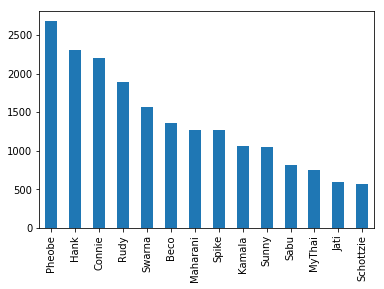

In [9]:
source_df["label"].value_counts().plot(kind="bar")

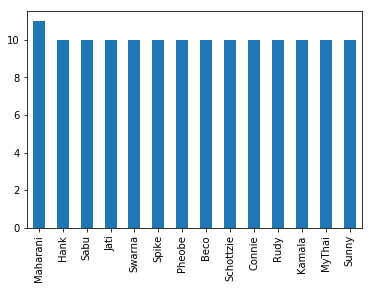

In [35]:
target_df["label"].value_counts().plot(kind="bar")

In [36]:
from sklearn.model_selection import train_test_split

#X_src_train, X_src_val, y_src_train, y_src_val = train_test_split(source_df["imagename"], source_df["label"], test_size=0.3, random_state=1,stratify=source_df["label"])

X_target_train, X_target_val, y_target_train, y_target_val = train_test_split(target_df["imagename"], target_df["label"], test_size=0.1, random_state=1,stratify=target_df["label"])


In [37]:
print(f"Len of source train:{X_src_train.shape}, length of source val: {X_src_val.shape}")

Len of source train:(13602,), length of source val: (5830,)


In [38]:
print(f"Len of target train:{X_target_train.shape}, length of target val: {X_target_val.shape}")

Len of target train:(126,), length of target val: (15,)


## Copy Files Between Folders

In [39]:
X_src_train.head(), X_target_train.head()

(8318     /share/jproject/fg508/mchivuku/datasets/asian_...
 4664     /share/jproject/fg508/mchivuku/datasets/asian_...
 11662    /share/jproject/fg508/mchivuku/datasets/asian_...
 7492     /share/jproject/fg508/mchivuku/datasets/asian_...
 13275    /share/jproject/fg508/mchivuku/datasets/asian_...
 Name: imagename, dtype: object,
 54    /share/jproject/fg508/mchivuku/datasets/asian_...
 57    /share/jproject/fg508/mchivuku/datasets/asian_...
 77    /share/jproject/fg508/mchivuku/datasets/asian_...
 87    /share/jproject/fg508/mchivuku/datasets/asian_...
 42    /share/jproject/fg508/mchivuku/datasets/asian_...
 Name: imagename, dtype: object)

In [23]:
## Loop to ccd, thermal folder - copy to all_files folder and rename
import shutil

def count_files(direc):
    print(len(os.listdir(direc)))
    return 


def copy_files(source_files, labels, target):
    copied_files = []
    for f, label in zip(source_files,labels):
        # Separate base from extension
        filename = os.path.basename(f)

        # Initial new name
        new_name = os.path.join(target,label)
        if not os.path.exists(new_name):
            os.makedirs(new_name)
            
        shutil.copy(f, os.path.join(new_name,filename))
        copied_files.append(f)
            
    return copied_files

In [24]:
## Copy SourceTrain, Source Val

source_train = list(X_src_train.values)
source_val =list(X_src_val.values)

source_train_labels =list(y_src_train.values)
source_val_labels = list(y_src_val.values)

## target
print(src_train_path,src_val_path)


/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/source_train/ /share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/source_val/


In [25]:
copy_files(source_train,source_train_labels,src_train_path)

['/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Kamala/Kamala_IMG_2226.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Connie/Connie_IMG_1659.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Beco/Beco_IMG_7804.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Rudy/Rudy_IMG_1448.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Pheobe/Pheobe_IMG_3686.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Pheobe/Pheobe_IMG_3862.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Spike/Spike_IMG_1085.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Sunny/Sunny_IMG_9565.JPG',
 '/share/jpr

In [26]:
copy_files(source_val,source_val_labels,src_val_path)

['/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Spike/Spike_IMG_0382.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Pheobe/Pheobe_IMG_5725.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Beco/Beco_IMG_7474.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Rudy/Rudy_IMG_1373.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Connie/Connie_IMG_1950.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Spike/Spike_IMG_0737.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Beco/Beco_IMG_7516.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/target-new/Swarna/Swarna_IMG_9213.JPG',
 '/share/jprojec

In [40]:
## Copy target train, target Val
target_train = list(X_target_train.values)
target_val =list(X_target_val.values)

target_train_labels =list(y_target_train.values)
target_val_labels = list(y_target_val.values)

## target
print(target_train_path,target_val_path)


/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/target_train/ /share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/target_val/


In [42]:
target_train[0],target_train_labels[0],target_val[0],target_val_labels[0],

('/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Kamala/IMG_2048.JPG',
 'Kamala',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Sunny/IMG_9518.JPG',
 'Sunny')

In [43]:
copy_files(target_train,target_train_labels,target_train_path)

['/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Kamala/IMG_2048.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Kamala/IMG_1936.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Sabu/IMG_4442.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Beco/IMG_7757.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Rudy/IMG_0297.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Sabu/IMG_4686.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Swarna/IMG_9477.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Kamala/IMG_2430.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgne

In [44]:
copy_files(target_val,target_val_labels,target_val_path)

['/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Sunny/IMG_9518.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Schottzie/IMG_5127.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Jati/IMG_3216.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Sabu/IMG_4725.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Kamala/IMG_2182.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Spike/IMG_1056.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Maharani/IMG_3683.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/metafgnet/all_images/auxiliary/Rudy/IMG_1161.JPG',
 '/share/jproject/fg508/mchivuku/datasets/asian_elephant/models/met